# Import libraries

In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter
import seaborn as sns
import matplotlib
from scipy import stats

import functions

# Import Data

In [2]:
#columns = ["bert_cased", "bert_multilingual_cased"]

In [3]:
#languages_lt = ["ENG", "GER", "GRE", "LAT", "FRE", "SPA", "ITA", "RUS", "GRC"]


In [4]:
metadata = pd.read_csv("./../data/metadata_books_with_tokens_counts_genre_language.tsv", sep="\t", index_col=0)

In [5]:
metadata

index                                               path language_code  \
0        232  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
1          7  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
2        161  ./../data/bibles/transformed_xml_with_year\SF_...           ARA   
3          8  ./../data/bibles/transformed_xml_with_year\SF_...           ARA   
4        162  ./../data/bibles/transformed_xml_with_year\SF_...           AZB   
...      ...                                                ...           ...   
11276    113  ./../data/bibles/transformed_xml_with_year\SF_...           VIE   
11277    199  ./../data/bibles/transformed_xml_with_year\SF_...           WIU   
11278    123  ./../data/bibles/transformed_xml_with_year\SF_...           XKL   
11279    200  ./../data/bibles/transformed_xml_with_year\SF_...           YBY   
11280    196  ./../data/bibles/transformed_xml_with_year\SF_...           ZIA   

                                           title  year  \
0                            Albanian Bible Tosk     0   
1                               Albanian Version     0   
2            New Arabic Version (Ketab El Hayat)     0   
3                    Smith Van Dyke Arabic Bible     0   
4      Description_en=Southern Azeri Translation     0   
...                                          ...   ...   
11276                         Vietnamese Version     0   
11277                          The New Testament     0   
11278                            Klingon Version     0   
11279                          The New Testament     0   
11280                                     Zia NT     0   

       number_verses_translation  number_chapters_translation  \
0                          31102                         1189   
1                          31102                         1189   
2                          31101                         1189   
3                          31102                         1189   
4                          31102                         1189   
...                          ...                          ...   
11276                      31102                         1189   
11277                       7817                          260   
11278                      31083                         1189   
11279                       7482                          241   
11280                       7844                          260   

       number_books_translation   source  \
0                            66  zefania   
1                            66  zefania   
2                            66  zefania   
3                            66  zefania   
4                            66  zefania   
...                         ...      ...   
11276                        66  zefania   
11277                        27  zefania   
11278                        66  zefania   
11279                        27  zefania   
11280                        27  zefania   

                                   file_name_translation  ...  \
0      SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...  ...   
1              SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)  ...   
2      SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...  ...   
3      SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...  ...   
4      SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...  ...   
...                                                  ...  ...   
11276         SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION)  ...   
11277        SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT)  ...   
11278        SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION)  ...   
11279        SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT)  ...   
11280                   SF_2014-04-22_ZIA_ZIANT_(ZIA NT)  ...   

      bert_multilingual_cased_count_parts_tokens_median/characters_count_median  \
0                                               0.140496                          
1                                               0.144000                        

In [6]:
metadata["family of languages"]

0        other Indo-European languages
1        other Indo-European languages
2                              Semitic
3                              Semitic
4                              Turkic 
                     ...              
11276                           Vietic
11277                     Austronesian
11278             constructed language
11279                 Trans–New Guinea
11280                 Trans–New Guinea
Name: family of languages, Length: 11281, dtype: object

In [7]:
metadata.columns.tolist()

['index',
 'path',
 'language_code',
 'title',
 'year',
 'number_verses_translation',
 'number_chapters_translation',
 'number_books_translation',
 'source',
 'file_name_translation',
 'book',
 'book_file_name',
 'text_first_verse',
 'id_first_verse',
 'text_count_tokens_mean',
 'text_count_tokens_median',
 'text_count_tokens_std',
 'characters_count_mean',
 'characters_count_median',
 'characters_count_std',
 'bert_cased_count_tokens_mean',
 'bert_cased_count_tokens_median',
 'bert_cased_count_tokens_std',
 'bert_cased_count_parts_tokens_mean',
 'bert_cased_count_parts_tokens_median',
 'bert_cased_count_parts_tokens_std',
 'bert_cased_count_unks_mean',
 'bert_cased_count_unks_median',
 'bert_cased_count_unks_std',
 'bert_multilingual_cased_count_tokens_mean',
 'bert_multilingual_cased_count_tokens_median',
 'bert_multilingual_cased_count_tokens_std',
 'bert_multilingual_cased_count_parts_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_median',
 'bert_multilingual_cased_coun

In [8]:
metadata.columns.tolist()[-20:]

['family of languages',
 'macro family of languages',
 'main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'in_Latin_script?',
 'bert_multilingual_cased_count_parts_tokens_median/characters_count_median',
 'bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median',
 'codebook',
 'title_English',
 'genre',
 'genre-multilabel',
 'wikid',
 'division',
 'original_language',
 'translation_period']

In [9]:
metadata["used_in_ml_bert?"] = metadata["used_in_ml_bert?"].astype(bool)

# Create Langauges_mean_df

In [10]:
languages_mean_df = metadata.groupby(["language"]).mean()




In [11]:
languages_mean_df

index         year  number_verses_translation  \
language                                                                
Albanian           119.500000     0.000000               31102.000000   
Arabic              85.083969     0.000000               31101.496183   
Azerbaijani        162.000000     0.000000               31102.000000   
Basque               9.000000     0.000000                7958.000000   
Belarusian         235.000000     0.000000               31169.000000   
Blackfoot          228.000000     0.000000                1071.000000   
Bulgarian          147.806452   555.677419               24381.774194   
Cebuano             10.500000     0.000000               31102.000000   
Chamorro           152.000000  1908.000000                7245.000000   
Chinese              9.000000     0.000000               31091.666667   
Coptic             184.000000     0.000000                7957.000000   
Croatian           137.000000     0.000000               35437.000000   
Czech              213.731959     0.000000               29013.309278   
Danish             125.732283  1003.511811               30618.669291   
Dusun Witu         199.000000     0.000000                7817.000000   
English             86.175796  1872.829724               26311.992781   
Esperanto           45.000000     0.000000               31102.000000   
Finnish            138.500000  1008.500000               31134.500000   
French             126.614020  1897.663007               31317.604730   
German             139.206240  1849.869863               25602.357686   
Gothic             131.400000     0.000000                2304.800000   
Greek               94.977011  1339.505747               13627.143678   
Haitian Creole      84.000000     0.000000               31060.000000   
Hebrew             132.701149     0.000000               25156.965517   
Hindi              233.000000     0.000000               31104.000000   
Hungarian           45.500000     0.000000               31127.500000   
Italian             98.463415  1920.475610               32833.164634   
Jamaican Creole    225.000000     0.000000                7917.000000   
Klingoln           123.000000     0.000000               31083.000000   
Korean              92.000000     0.000000               30625.000000   
Kurdish            209.000000     0.000000                7939.000000   
Latin              161.400000  1495.600000               33373.400000   
Low German          95.490909     0.000000                9244.472727   
Marathi            234.000000     0.000000               31104.000000   
Norwegian          132.015385     0.000000               30681.907692   
Pohnpeian          205.000000     0.000000               10415.000000   
Portuguese          99.500000  1971.500000               31101.000000   
Romanian           174.500000   964.000000               31102.000000   
Russian            130.989865   466.962838               29281.138514   
Scottish Gaelic    117.000000     0.000000                2874.333333   
Shuar              104.000000     0.000000                7957.000000   
Spanish             96.450000  1876.750000               30744.900000   
Swahili            107.000000     0.000000                7815.000000   
Swedish            128.000000  1957.500000               31103.500000   
Swiss High German   97.000000     0.000000               31079.000000   
Syriac             109.000000     0.000000                7913.000000   
Tagalog            110.000000     0.000000               31102.000000   
Tamil              214.000000     0.000000               31102.000000   
Thai               111.000000     0.000000               31102.000000   
Turkish              1.000000     0.000000               30182.000000   
Uma                112.000000     0.000000                7957.000000   
Vietnamese         125.500000  1001.000000               31099.000000   
Yaweyuha           200.000000     0.000000                7482.000000   
Zia      

In [12]:
languages_mean_df = pd.merge(metadata.groupby(["language"]).head(1)[["language", "macro family of languages", "main writing system"]],languages_mean_df, left_on=  "language", right_index=True)


In [13]:
languages_mean_df.head()

language         macro family of languages main writing system  \
0     Albanian  Albanian-Slavic-Romance-Germanic        Latin script   
2       Arabic                           Semitic     Arabic alphabet   
4  Azerbaijani                           Turkic      Arabic alphabet   
5   Belarusian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
6    Bulgarian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   

        index        year  number_verses_translation  \
0  119.500000    0.000000               31102.000000   
2   85.083969    0.000000               31101.496183   
4  162.000000    0.000000               31102.000000   
5  235.000000    0.000000               31169.000000   
6  147.806452  555.677419               24381.774194   

   number_chapters_translation  number_books_translation  \
0                  1189.000000                 66.000000   
2                  1189.000000                 66.000000   
4                  1189.000000                 66.000000   
5                  1190.000000                 66.000000   
6                   919.290323                 54.677419   

   text_count_tokens_mean  text_count_tokens_median  ...  \
0               28.675941                 27.553030  ...   
2               16.457412                 15.812977  ...   
4               18.533909                 17.810606  ...   
5               23.020679                 22.121212  ...   
6               24.135792                 23.268817  ...   

   bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean  \
0                                           1.678507                  
2                                           4.326791                  
4                                           3.192559                  
5                                           2.009111                  
6                                           1.717894                  

   bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean  \
0                                           0.664223                        
2                                           3.283510                        
4                                           2.057189                        
5                                           1.023780                        
6                                           0.719718                        

   bert_multilingual_cased_count_unks_mean/text_count_tokens_mean  \
0                                           0.009851                
2                                           0.000000                
4                                           0.000061                
5                                           0.006454                
6                                           0.004006                

   used_in_ml_bert?  wikipedia_nr_articles_2021  is_English?  \
0              True                     84162.0        False   
2              True                   1140422.0        False   
4              True                    179494.0        False   
5              True                    209937.0        False   
6              True                    275867.0        False   

   is_Romance_or_Germanic?  in_Latin_script?  \
0                    False              True   
2                    False             False   
4                    False             False   
5                    False             False   
6                    False             False   

   bert_multilingual_cased_count_parts_tokens_median/characters_count_median  \
0                                           0.144235                           
2                                           0.437399                           
4                                           0.326724                           
5                                           0.212890                           
6                                           0.152732                           

   bert_multilingual_cased_count_parts_tokens_median/t

# Language

## Number of characters

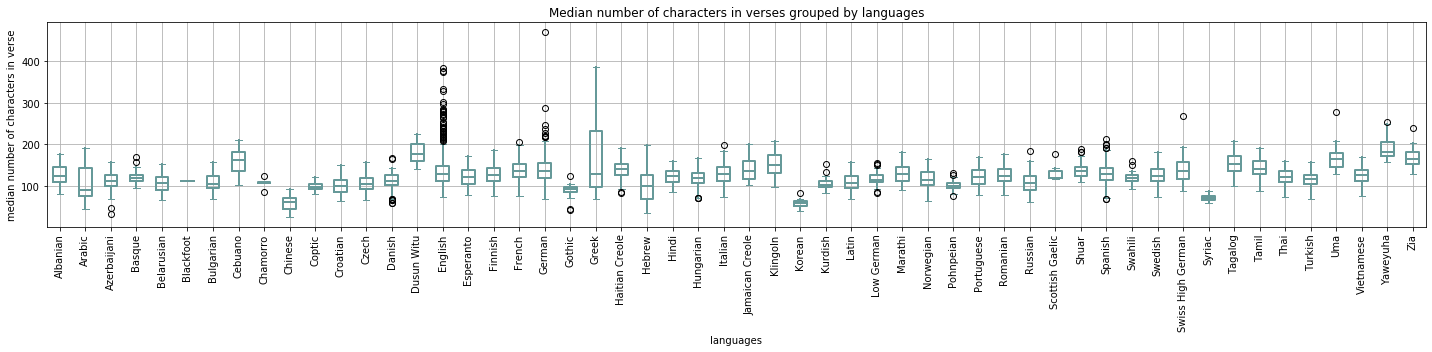

In [14]:
functions.plot_boxplots_by(metadata.loc[metadata["characters_count_median"]<500], "characters_count_median", "language", rot = 90, xlabel = "languages", ylabel = "median number of characters in verse", title = "Median number of characters in verses grouped by languages", figure_name = "languages_characters_median")

## Number of tokens

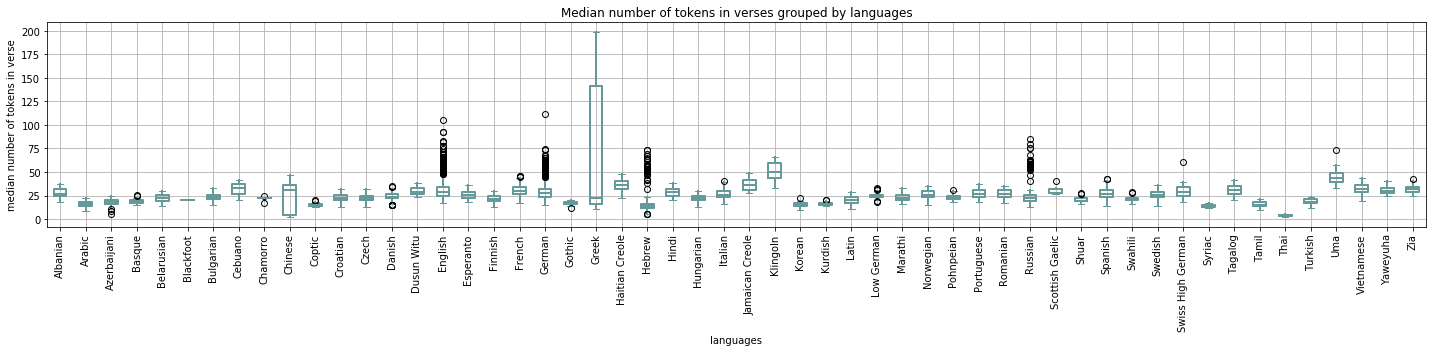

In [15]:
functions.plot_boxplots_by(metadata.loc[metadata["text_count_tokens_median"]<200], "text_count_tokens_median", "language", rot = 90, xlabel = "languages", ylabel = "median number of tokens in verse", title = "Median number of tokens in verses grouped by languages", figure_name = "languages_tokens_median")

In [15]:
metadata["characters_count_mean/text_count_tokens_mean"] =  metadata["characters_count_mean"] / metadata["text_count_tokens_mean"]

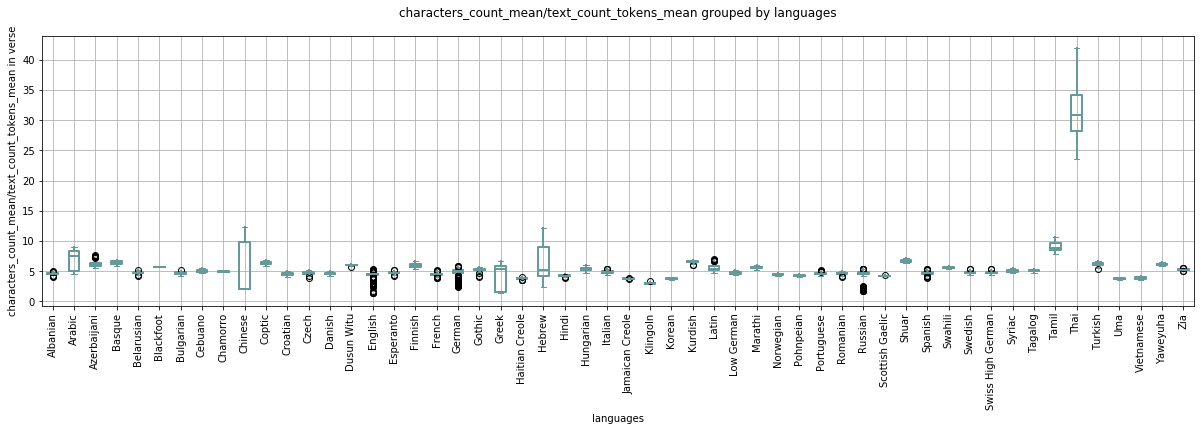

In [16]:
functions.plot_boxplots_by(metadata.loc[metadata["text_count_tokens_median"]<200], "characters_count_mean/text_count_tokens_mean", "language", rot = 90, xlabel = "languages", ylabel = "characters_count_mean/text_count_tokens_mean in verse", title = "characters_count_mean/text_count_tokens_mean grouped by languages", figure_name = "languages_tokens_characters_count_mean_text_count_tokens_mean")

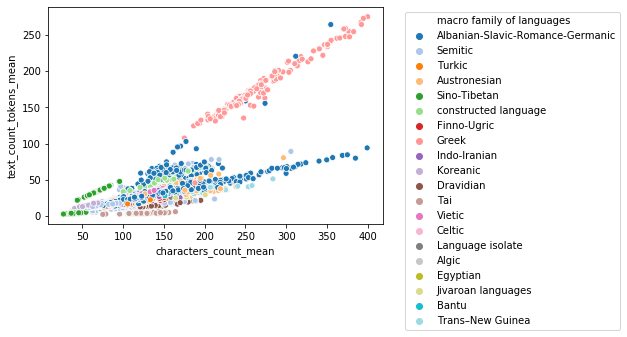

In [17]:
sns.scatterplot(x ="characters_count_mean", y = "text_count_tokens_mean",
hue = "macro family of languages", data = metadata.loc[(metadata["characters_count_mean"] < 400) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1, 
)
"""
plt.plot([10, 180], [10, 180], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 360],[10, 180], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 3))], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 4))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 5))], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 6))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 7))], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 8))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 9))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 10))], c = "black", lw=0.5, alpha=0.5)

plt.text(120, 120, s = "unigrams", rotation=55, fontsize=12)
plt.text(250, 120, s = "2-grams", rotation=36, fontsize=12)
plt.text(300, 95, s = "3-grams", rotation=28, fontsize=12)
plt.text(350, 80, s = "4-grams", rotation=18, fontsize=12)
plt.text(350, 50, s = "6-grams", rotation=15, fontsize=12)
plt.text(350, 35, s = "8-grams", rotation=10, fontsize=12)
"""
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


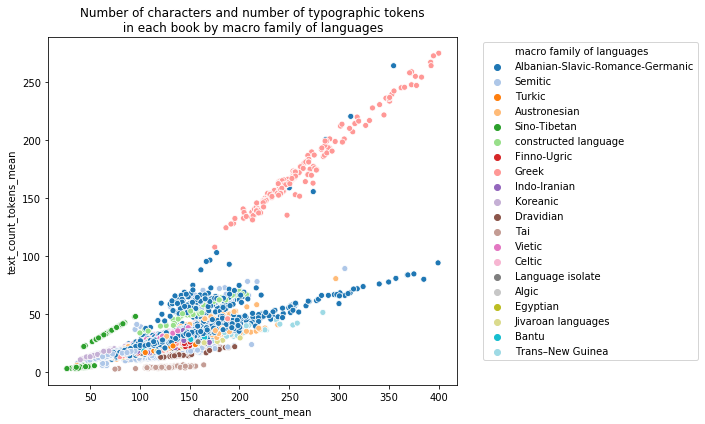

In [18]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["characters_count_mean"] < 400) ],
        column_x = "characters_count_mean", column_y = "text_count_tokens_mean",
        column_color = "macro family of languages", title = "Number of characters and number of typographic tokens\n in each book by macro family of languages ",
        outdir = "./../visualizations/", figure_name = "characters_tokens_macro_familiy", figsize = (10,6)
        )

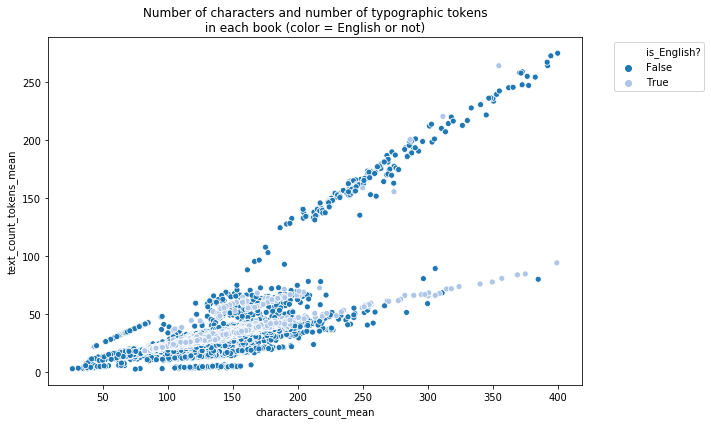

In [19]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["characters_count_mean"] < 400) ].sort_values(by="is_English?"), figsize = (10,6),
        column_x = "characters_count_mean", column_y = "text_count_tokens_mean",
        column_color = "is_English?", title = "Number of characters and number of typographic tokens\n in each book (color = English or not) ", outdir = "./../visualizations/", figure_name = "characters_tokens_english")

In [20]:
len(metadata["language"].unique())


54

In [21]:
i = 0
for item in metadata.groupby(["language"])["text_count_tokens_median"].mean().sort_values().index.tolist():
    if item == "English":
        print(i, item)
    i += 1




41 English


In [22]:
metadata.groupby(["language"])["text_count_tokens_median"].mean().sort_values().head(20)

language
Thai            3.795455
Syriac         14.296296
Korean         15.280303
Coptic         15.518519
Arabic         15.812977
Tamil          15.909091
Kurdish        16.277778
Gothic         17.116667
Azerbaijani    17.810606
Turkish        18.507692
Basque         19.037037
Hebrew         19.526820
Latin          19.978788
Blackfoot      20.000000
Shuar          20.592593
Finnish        21.371212
Swahili        21.538462
Chamorro       21.666667
Belarusian     22.121212
Hungarian      22.261364
Name: text_count_tokens_median, dtype: float64

In [23]:
metadata.groupby(["language"])["text_count_tokens_median"].mean().sort_values().tail(20)

language
Romanian             26.988636
Spanish              27.413258
Albanian             27.553030
Hindi                28.583333
German               28.910959
Swiss High German    28.962121
Dusun Witu           29.759259
English              30.111890
French               30.211149
Yaweyuha             30.351852
Tagalog              30.553030
Scottish Gaelic      30.916667
Cebuano              31.655303
Vietnamese           32.234848
Zia                  32.425926
Haitian Creole       36.219697
Jamaican Creole      36.703704
Uma                  45.037037
Klingoln             50.530303
Greek                76.156130
Name: text_count_tokens_median, dtype: float64

In [24]:
results_df = functions.test_differences_columns(metadata, "language", "text_count_tokens_mean")

C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [25]:
results_df

value1       value2        pvalue  statistic  mean_value_1  \
0       Albanian       Arabic  3.632809e-67  26.293643     28.675941   
1       Albanian  Azerbaijani  2.562529e-40  17.552872     28.675941   
2       Albanian       Basque  9.528278e-26  15.340770     28.675941   
3       Albanian   Belarusian  2.902945e-16   9.144273     28.675941   
4       Albanian    Blackfoot           NaN        NaN     28.675941   
...          ...          ...           ...        ...           ...   
1426         Uma     Yaweyuha  2.023025e-10   8.528793     48.290627   
1427         Uma          Zia  8.359742e-08   6.490015     48.290627   
1428  Vietnamese     Yaweyuha  4.018269e-01   0.846757     33.536341   
1429  Vietnamese          Zia  1.568426e-02  -2.525891     33.536341   
1430    Yaweyuha          Zia  8.499838e-03  -2.736886     32.737279   

      mean_value_2  median_value_1  median_value_2 significance  
0        16.457412       28.250000       16.384615          ***  
1        18.533909       28.250000       18.300581          ***  
2        19.605547       28.250000       19.833333          ***  
3        23.020679       28.250000       23.413056          ***  
4        21.176892       28.250000       21.176892               
...            ...             ...             ...          ...  
1426     32.737279       48.179104       31.628866          ***  
1427     36.145396       48.179104       36.173333          ***  
1428     32.737279       32.887394       31.628866               
1429     36.145396       32.887394       36.173333            *  
1430     36.145396       31.628866       36.173333           **  

[1431 rows x 9 columns]

In [26]:
results_df.loc[((results_df["value1"] == "English") | (results_df["value2"] == "English"))]


value1             value2         pvalue   statistic  mean_value_1  \
14      Albanian            English   2.728244e-09   -6.181833     28.675941   
66        Arabic            English  6.687303e-196  -46.078684     16.457412   
117  Azerbaijani            English   3.051652e-53  -27.504211     18.533909   
167       Basque            English   9.926843e-28  -24.414782     19.605547   
216   Belarusian            English   1.033799e-30  -16.390478     23.020679   
264    Blackfoot            English            NaN         NaN     21.176892   
311    Bulgarian            English   6.047816e-37  -16.280290     24.135792   
357      Cebuano            English   1.485278e-02    2.457328     32.977582   
402     Chamorro            English   1.751144e-04   -8.731345     22.832045   
446      Chinese            English   5.602718e-09   -6.071098     24.874645   
489       Coptic            English   6.922338e-54  -41.688773     15.914267   
531     Croatian            English   4.589830e-21  -12.470838     23.399229   
572        Czech            English  1.445738e-124  -26.516398     23.148852   
612       Danish            English   6.592656e-33  -13.755234     25.685205   
651   Dusun Witu            English   7.621007e-01   -0.305366     31.364923   
690      English          Esperanto   4.743093e-14    8.839467     31.611053   
691      English            Finnish   1.885315e-65   22.385025     31.611053   
692      English             French   6.264860e-01    0.486722     31.611053   
693      English             German   5.384607e-04    3.464204     31.611053   
694      English             Gothic   2.389859e-49   34.965830     31.611053   
695      English              Greek   1.145878e-37  -13.906608     31.611053   
696      English     Haitian Creole   1.917661e-14   -9.214196     31.611053   
697      English             Hebrew   1.958723e-12    7.369377     31.611053   
698      English              Hindi   1.874038e-03    3.199012     31.611053   
699      English          Hungarian   1.273730e-58   20.393953     31.611053   
700      English            Italian   7.422160e-23   10.098058     31.611053   
701      English    Jamaican Creole   6.391384e-06   -5.534941     31.611053   
702      English           Klingoln   1.234552e-28  -18.320578     31.611053   
703      English             Korean   2.154465e-97   41.753925     31.611053   
704      English            Kurdish   1.916298e-32   30.494136     31.611053   
705      English              Latin  3.204353e-183   33.744902     31.611053   
706      English         Low German   2.388712e-25   13.503213     31.611053   
707      English            Marathi   1.129204e-23   13.279836     31.611053   
708      English          Norwegian   7.492733e-18    9.319140     31.611053   
709      English          Pohnpeian   1.296064e-15   12.501300     31.611053   
710      English         Portuguese   1.550091e-16    8.883617     31.611053   
711      English           Romanian   7.630243e-15    8.244016     31.611053   
712      English            Russian   4.766183e-07    5.133182     31.611053   
713      English    Scottish Gaelic   7.299502e-01   -0.364728     31.611053   
714      English              Shuar   4.028148e-16   14.360818     31.611053   
715      English            Spanish   4.999931e-26   10.639045     31.611053   
716      English            Swahili   1.102995e-18   16.529129     31.611053   
717      English            Swedish   1.408292e-18    9.519941     31.611053   
718      English  Swiss High German   5.836212e-02    1.921199     31.611053   
719      English             Syriac   6.039635e-64   46.905675     31.611053   
720      English            Tagalog   9.263433e-01   -0.092722     31.611053   
721      English              Tamil   1.519447e-70   34.902567     31.611053   
722      English               Thai   0.000000e+00  105.580273     31.611053   
723      English            Turkish   9.838417e-61   28.224317     31.611053   
724      E

In [27]:
results_df.loc[((results_df["value1"] == "English") | (results_df["value2"] == "English")) & (results_df["pvalue"] < 0.05) ]

value1           value2         pvalue   statistic  mean_value_1  \
14      Albanian          English   2.728244e-09   -6.181833     28.675941   
66        Arabic          English  6.687303e-196  -46.078684     16.457412   
117  Azerbaijani          English   3.051652e-53  -27.504211     18.533909   
167       Basque          English   9.926843e-28  -24.414782     19.605547   
216   Belarusian          English   1.033799e-30  -16.390478     23.020679   
311    Bulgarian          English   6.047816e-37  -16.280290     24.135792   
357      Cebuano          English   1.485278e-02    2.457328     32.977582   
402     Chamorro          English   1.751144e-04   -8.731345     22.832045   
446      Chinese          English   5.602718e-09   -6.071098     24.874645   
489       Coptic          English   6.922338e-54  -41.688773     15.914267   
531     Croatian          English   4.589830e-21  -12.470838     23.399229   
572        Czech          English  1.445738e-124  -26.516398     23.148852   
612       Danish          English   6.592656e-33  -13.755234     25.685205   
690      English        Esperanto   4.743093e-14    8.839467     31.611053   
691      English          Finnish   1.885315e-65   22.385025     31.611053   
693      English           German   5.384607e-04    3.464204     31.611053   
694      English           Gothic   2.389859e-49   34.965830     31.611053   
695      English            Greek   1.145878e-37  -13.906608     31.611053   
696      English   Haitian Creole   1.917661e-14   -9.214196     31.611053   
697      English           Hebrew   1.958723e-12    7.369377     31.611053   
698      English            Hindi   1.874038e-03    3.199012     31.611053   
699      English        Hungarian   1.273730e-58   20.393953     31.611053   
700      English          Italian   7.422160e-23   10.098058     31.611053   
701      English  Jamaican Creole   6.391384e-06   -5.534941     31.611053   
702      English         Klingoln   1.234552e-28  -18.320578     31.611053   
703      English           Korean   2.154465e-97   41.753925     31.611053   
704      English          Kurdish   1.916298e-32   30.494136     31.611053   
705      English            Latin  3.204353e-183   33.744902     31.611053   
706      English       Low German   2.388712e-25   13.503213     31.611053   
707      English          Marathi   1.129204e-23   13.279836     31.611053   
708      English        Norwegian   7.492733e-18    9.319140     31.611053   
709      English        Pohnpeian   1.296064e-15   12.501300     31.611053   
710      English       Portuguese   1.550091e-16    8.883617     31.611053   
711      English         Romanian   7.630243e-15    8.244016     31.611053   
712      English          Russian   4.766183e-07    5.133182     31.611053   
714      English            Shuar   4.028148e-16   14.360818     31.611053   
715      English          Spanish   4.999931e-26   10.639045     31.611053   
716      English          Swahili   1.102995e-18   16.529129     31.611053   
717      English          Swedish   1.408292e-18    9.519941     31.611053   
719      English           Syriac   6.039635e-64   46.905675     31.611053   
721      English            Tamil   1.519447e-70   34.902567     31.611053   
722      English             Thai   0.000000e+00  105.580273     31.611053   
723      English          Turkish   9.838417e-61   28.224317     31.611053   
724      English              Uma   9.495093e-11  -10.155909     31.611053   
725      English       Vietnamese   2.187569e-04   -3.759789     31.611053   
727      English              Zia   5.238316e-05   -4.721340     31.611053   

     mean_value_2  median_value_1  median_value_2 significance  
14      31.611053       28.250000       29.540404          ***  
66      31.611053       16.384615       29.540404          ***  
117     31.611053       18.300581       29.540404          ***  
167     31.611053       19.833333       29.540404          ***  
216     31.611053 

## Tokens Multilingual BERT

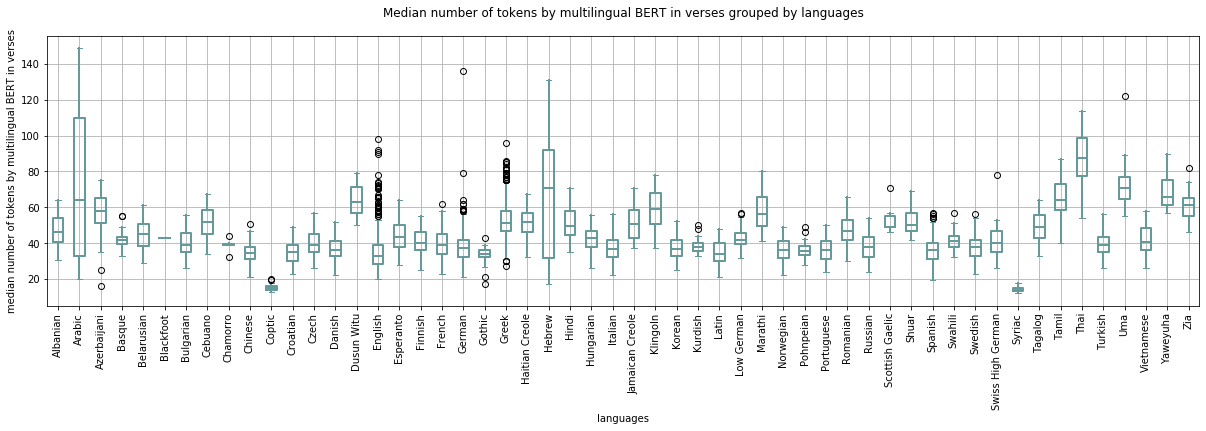

In [28]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_tokens_median"]<1000], "bert_multilingual_cased_count_tokens_median", "language", rot = 90, xlabel = "languages", ylabel = "median number of tokens by multilingual BERT in verses", title = "Median number of tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_median")

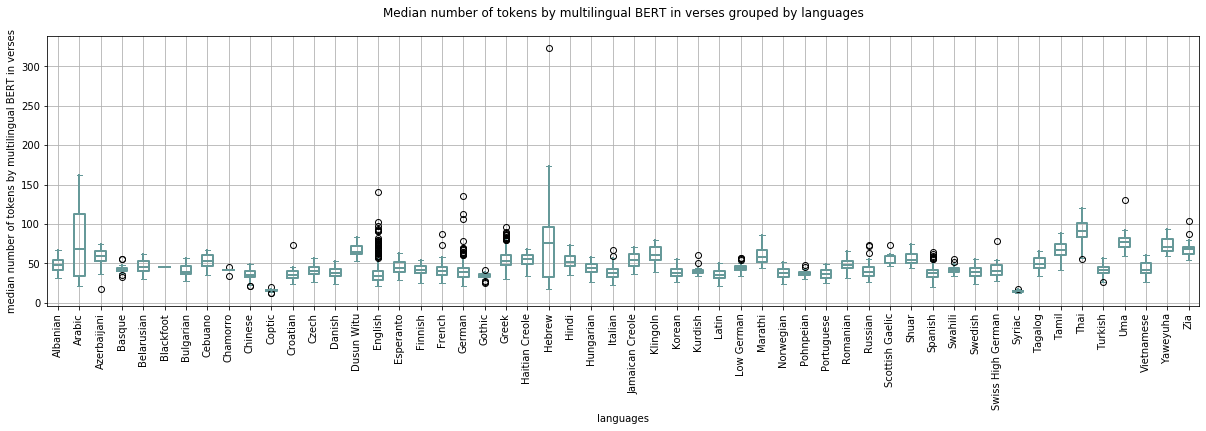

In [29]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_tokens_mean"]<1000], "bert_multilingual_cased_count_tokens_mean", "language", rot = 90, xlabel = "languages", ylabel = "median number of tokens by multilingual BERT in verses", title = "Median number of tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_median")

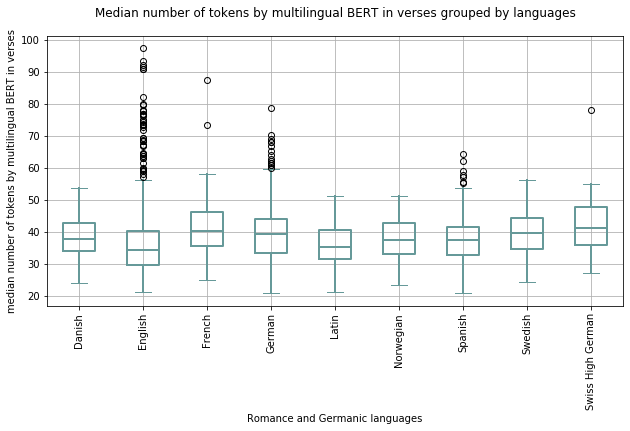

In [30]:
functions.plot_boxplots_by(metadata.loc[(metadata["language_code"].isin(["GER", "ENG", "NL_", "NOR", "DAN", "SWE", "FRE", "LAT", "SPA"])) & (metadata["bert_multilingual_cased_count_tokens_mean"] < 100)], "bert_multilingual_cased_count_tokens_mean", "language", rot = 90, xlabel = "Romance and Germanic languages", ylabel = "median number of tokens by multilingual BERT in verses", title = "Median number of tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_median_germanic_romance", figsize=(10,5))


In [31]:
900 - (900 * (50/180))

650.0

In [32]:
180 * 1

180

In [33]:
180 * 2

360

In [34]:
180  * 3

540

In [35]:
400 / 540

0.7407407407407407

In [36]:
180 * (400 / ((180) * 3))

133.33333333333331

In [37]:
180 * (400 / ((180) * 3))

133.33333333333331

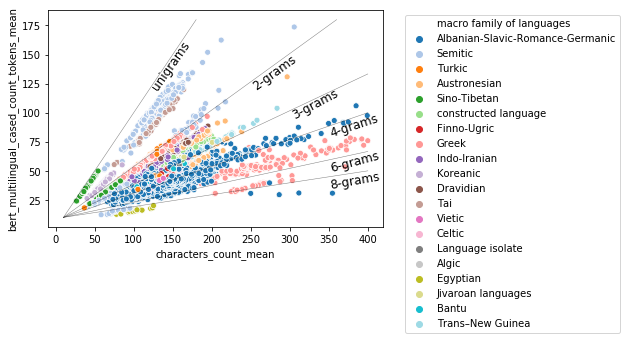

In [38]:
sns.scatterplot(x ="characters_count_mean", y = "bert_multilingual_cased_count_tokens_mean",
hue = "macro family of languages", data = metadata.loc[(metadata["characters_count_mean"] < 400) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1, 
)

plt.plot([10, 180], [10, 180], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 360],[10, 180], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 3))], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 4))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 5))], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 6))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 7))], c = "black", lw=0.5, alpha=0.5)
plt.plot([10, 400],[10, 180 * (400 / ((180) * 8))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 9))], c = "black", lw=0.5, alpha=0.5)
#plt.plot([10, 400],[10, 180 * (400 / ((180) * 10))], c = "black", lw=0.5, alpha=0.5)

plt.text(120, 120, s = "unigrams", rotation=55, fontsize=12)
plt.text(250, 120, s = "2-grams", rotation=36, fontsize=12)
plt.text(300, 95, s = "3-grams", rotation=28, fontsize=12)
plt.text(350, 80, s = "4-grams", rotation=18, fontsize=12)
plt.text(350, 50, s = "6-grams", rotation=15, fontsize=12)
plt.text(350, 35, s = "8-grams", rotation=10, fontsize=12)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


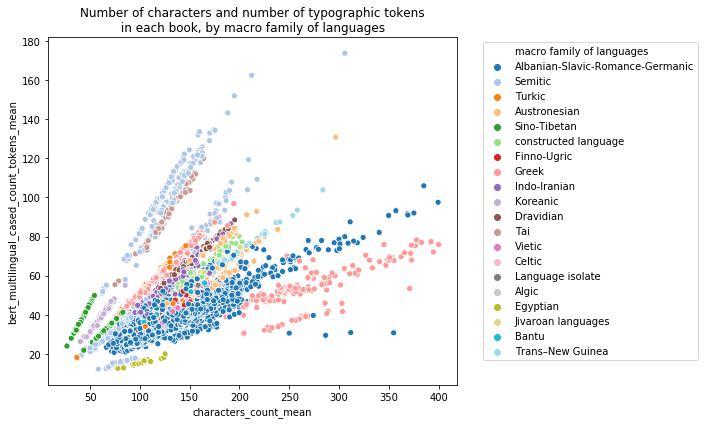

In [39]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["characters_count_mean"] < 400) ],
        column_x = "characters_count_mean", column_y = "bert_multilingual_cased_count_tokens_mean",
        column_color = "macro family of languages", title = "Number of characters and number of typographic tokens\n in each book, by macro family of languages ", outdir = "./../visualizations/", figure_name = "characters_bert_tokens_macro_families")

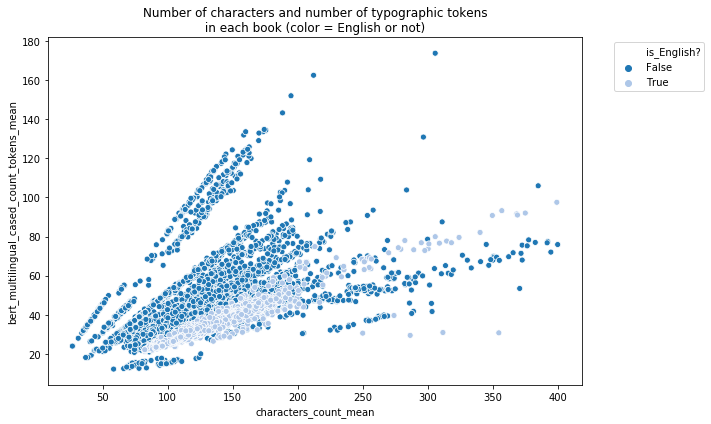

In [40]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["characters_count_mean"] < 400) ].sort_values(by="is_English?"),
        column_x = "characters_count_mean", column_y = "bert_multilingual_cased_count_tokens_mean",
        column_color = "is_English?", title = "Number of characters and number of typographic tokens\n in each book (color = English or not) ", outdir = "./../visualizations/", figure_name = "characters_bert_tokens_english")

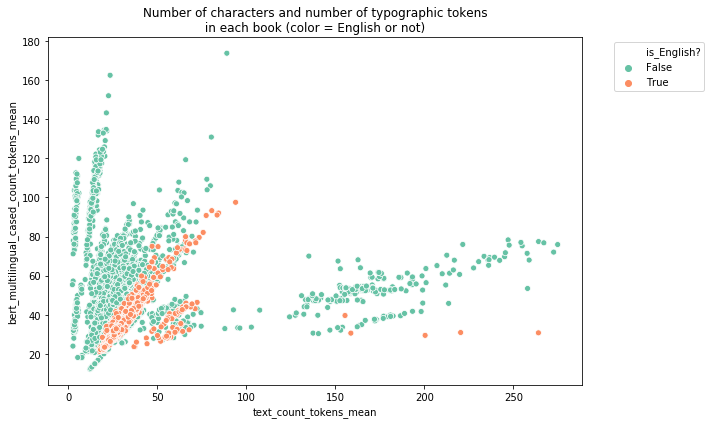

In [41]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["characters_count_mean"] < 400) ].sort_values(by="is_English?"),
        column_x = "text_count_tokens_mean", column_y = "bert_multilingual_cased_count_tokens_mean", palette= "Set2",
        column_color = "is_English?", title = "Number of characters and number of typographic tokens\n in each book (color = English or not) ", outdir = "./../visualizations/", figure_name = "tokens_bert_tokens_english")

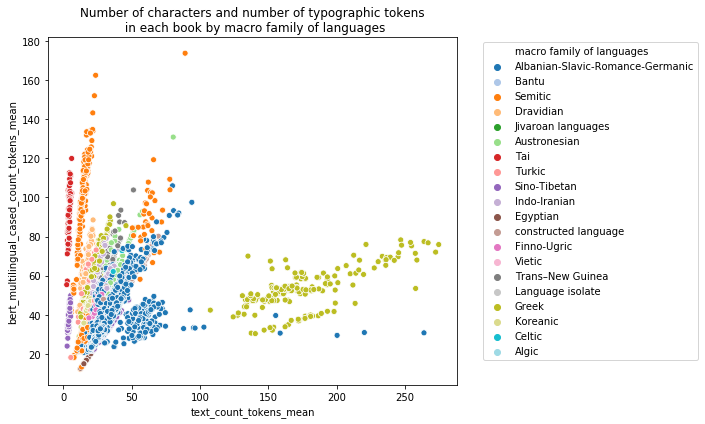

In [42]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["characters_count_mean"] < 400) ].sort_values(by="is_English?"),
        column_x = "text_count_tokens_mean", column_y = "bert_multilingual_cased_count_tokens_mean", palette= "tab20",
        column_color = "macro family of languages", title = "Number of characters and number of typographic tokens\n in each book by macro family of languages", outdir = "./../visualizations/", figure_name = "tokens_bert_tokens_macro_families")

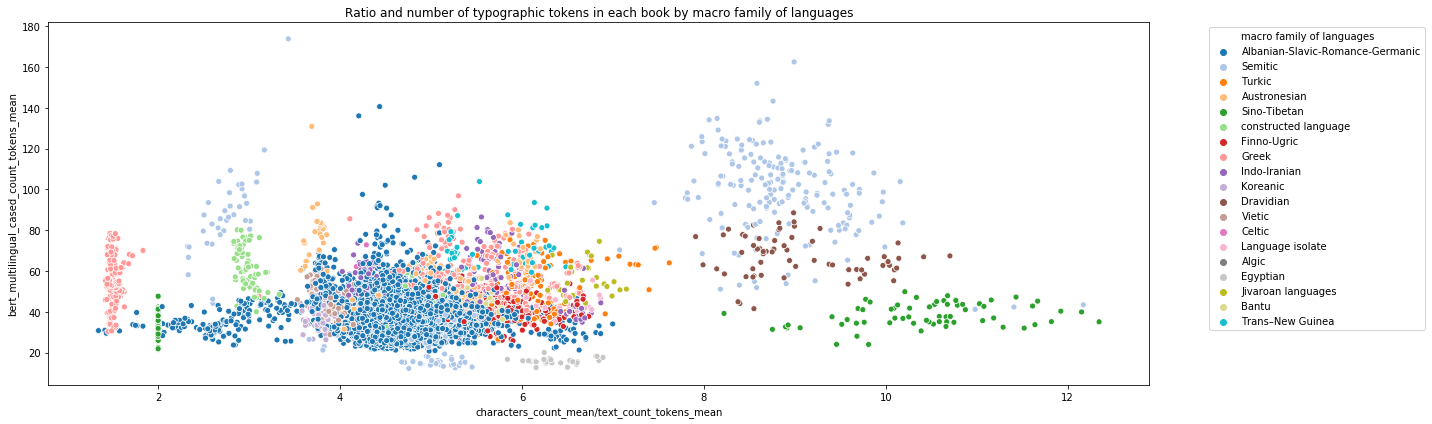

In [43]:
functions.plot_scatter_w_colors( metadata.loc[(metadata["characters_count_mean/text_count_tokens_mean"] < 15) & (metadata["bert_multilingual_cased_count_tokens_mean"] < 200) ],
        column_x = "characters_count_mean/text_count_tokens_mean", column_y = "bert_multilingual_cased_count_tokens_mean", palette= "tab20", figsize= (20,6),
        column_color = "macro family of languages", title = "Ratio and number of typographic tokens in each book by macro family of languages", outdir = "./../visualizations/", figure_name = "ratio_tokens_bert_tokens_macro_families")

In [44]:
metadata.columns.tolist()

['index',
 'path',
 'language_code',
 'title',
 'year',
 'number_verses_translation',
 'number_chapters_translation',
 'number_books_translation',
 'source',
 'file_name_translation',
 'book',
 'book_file_name',
 'text_first_verse',
 'id_first_verse',
 'text_count_tokens_mean',
 'text_count_tokens_median',
 'text_count_tokens_std',
 'characters_count_mean',
 'characters_count_median',
 'characters_count_std',
 'bert_cased_count_tokens_mean',
 'bert_cased_count_tokens_median',
 'bert_cased_count_tokens_std',
 'bert_cased_count_parts_tokens_mean',
 'bert_cased_count_parts_tokens_median',
 'bert_cased_count_parts_tokens_std',
 'bert_cased_count_unks_mean',
 'bert_cased_count_unks_median',
 'bert_cased_count_unks_std',
 'bert_multilingual_cased_count_tokens_mean',
 'bert_multilingual_cased_count_tokens_median',
 'bert_multilingual_cased_count_tokens_std',
 'bert_multilingual_cased_count_parts_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_median',
 'bert_multilingual_cased_coun

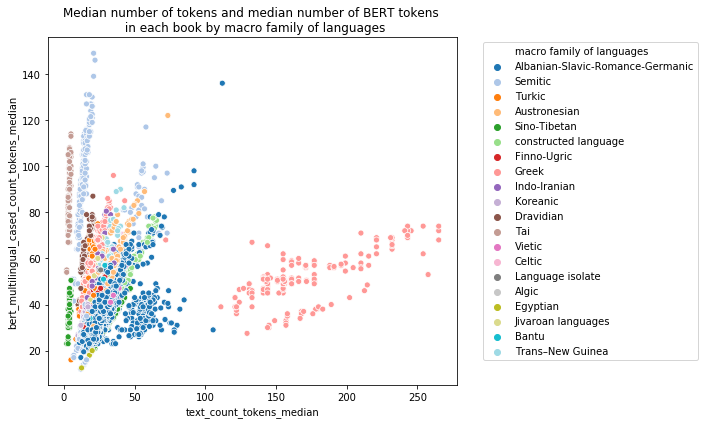

In [45]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300) ],
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_tokens_median", palette= "tab20",
        column_color = "macro family of languages", title = "Median number of tokens and median number of BERT tokens \n in each book by macro family of languages", outdir = "./../visualizations/", figure_name = "median_tokens_bert_tokens_macro_families")

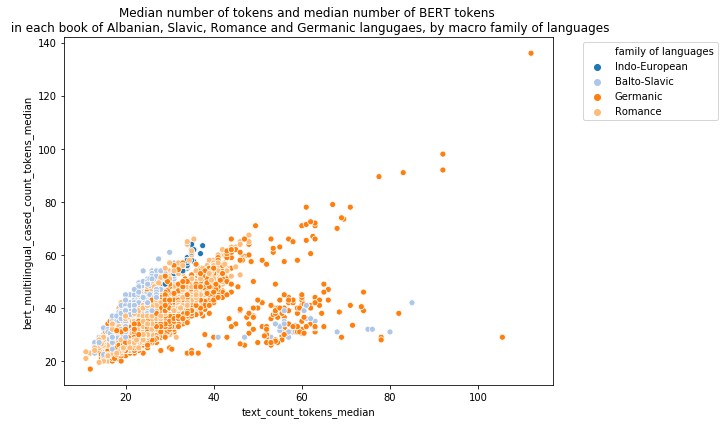

In [46]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300) & (metadata["macro family of languages"] == "Albanian-Slavic-Romance-Germanic")],
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_tokens_median", palette= "tab20",
        column_color = "family of languages", title = "Median number of tokens and median number of BERT tokens \n in each book of Albanian, Slavic, Romance and Germanic langugaes, by macro family of languages", outdir = "./../visualizations/", figure_name = "european_median_tokens_bert_tokens_macro_families")

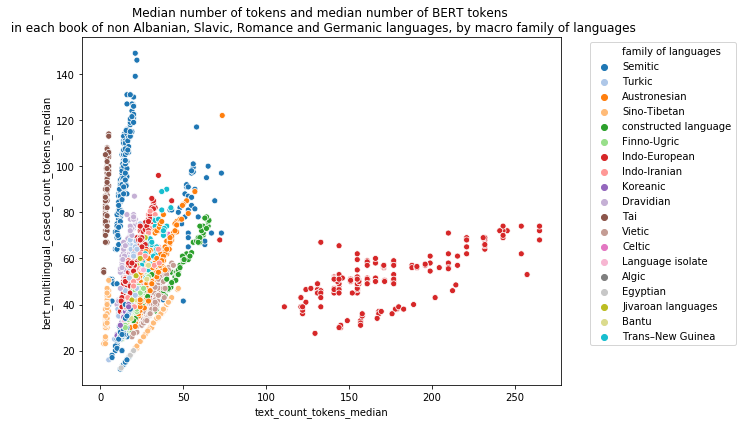

In [47]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300) & (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")],
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_tokens_median", palette= "tab20",
        column_color = "family of languages", title = "Median number of tokens and median number of BERT tokens \n in each book of non Albanian, Slavic, Romance and Germanic languages, by macro family of languages", outdir = "./../visualizations/", figure_name = "non_european_median_tokens_bert_tokens_macro_families")

## Part Tokens Multilingual BERT

### Family of languages

In [48]:
metadata.columns.tolist()

['index',
 'path',
 'language_code',
 'title',
 'year',
 'number_verses_translation',
 'number_chapters_translation',
 'number_books_translation',
 'source',
 'file_name_translation',
 'book',
 'book_file_name',
 'text_first_verse',
 'id_first_verse',
 'text_count_tokens_mean',
 'text_count_tokens_median',
 'text_count_tokens_std',
 'characters_count_mean',
 'characters_count_median',
 'characters_count_std',
 'bert_cased_count_tokens_mean',
 'bert_cased_count_tokens_median',
 'bert_cased_count_tokens_std',
 'bert_cased_count_parts_tokens_mean',
 'bert_cased_count_parts_tokens_median',
 'bert_cased_count_parts_tokens_std',
 'bert_cased_count_unks_mean',
 'bert_cased_count_unks_median',
 'bert_cased_count_unks_std',
 'bert_multilingual_cased_count_tokens_mean',
 'bert_multilingual_cased_count_tokens_median',
 'bert_multilingual_cased_count_tokens_std',
 'bert_multilingual_cased_count_parts_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_median',
 'bert_multilingual_cased_coun

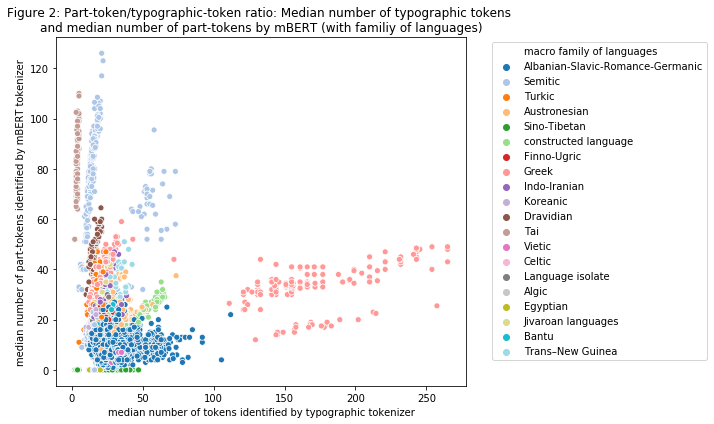

In [25]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300)],
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_parts_tokens_median", palette= "tab20",
        xlabel = "median number of tokens identified by typographic tokenizer", ylabel = "median number of part-tokens identified by mBERT tokenizer",

        column_color = "macro family of languages", title = "Figure 2: Part-token/typographic-token ratio: Median number of typographic tokens \nand median number of part-tokens by mBERT (with familiy of languages)", outdir = "./../visualizations/",
        figure_name = "figure2_median_tokens_bert_tokens_macro_families")

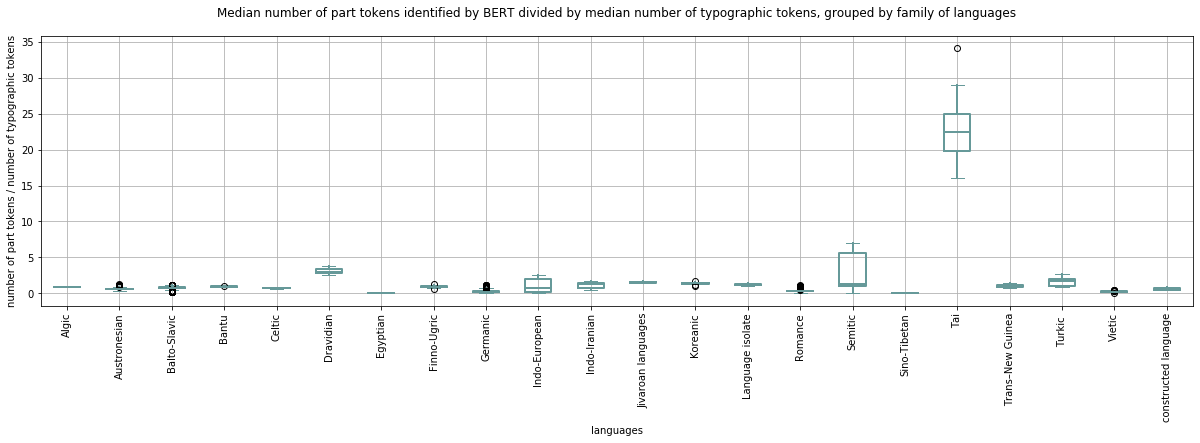

In [50]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "family of languages", rot = 90, xlabel = "languages", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens, grouped by family of languages", figure_name = "part_tokens_typographic_tokens_family_languages_all")

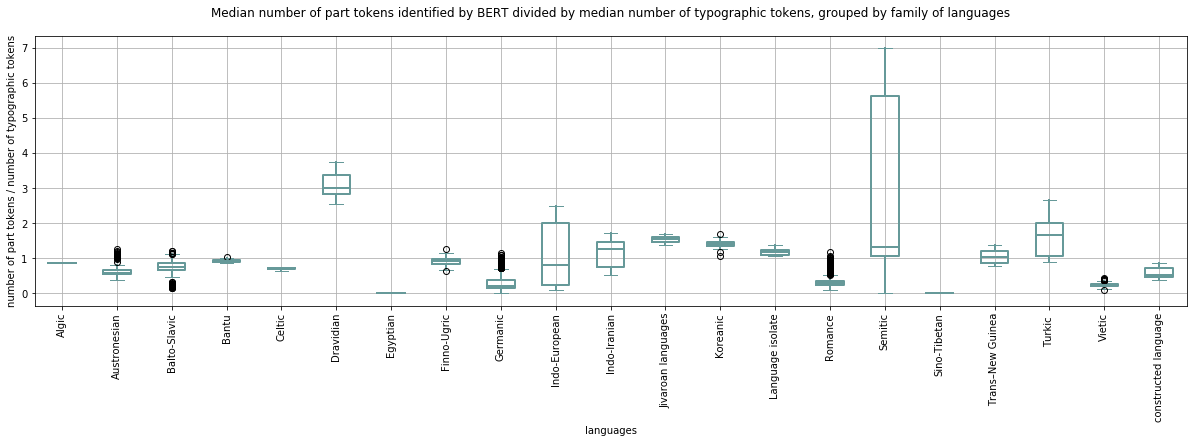

In [51]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "family of languages", rot = 90, xlabel = "languages", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens, grouped by family of languages", figure_name = "part_tokens_typographic_tokens_family_languages")

In [52]:
metadata.groupby("family of languages")["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"].mean().sort_values()

family of languages
Sino-Tibetan             0.000000
Egyptian                 0.000000
Vietic                   0.239346
Germanic                 0.264638
Romance                  0.347366
constructed language     0.580042
Austronesian             0.633659
Celtic                   0.694313
Balto-Slavic             0.757416
Algic                    0.850000
Finno-Ugric              0.908163
Bantu                    0.923929
Trans–New Guinea         1.037140
Indo-Iranian             1.143057
Indo-European            1.155275
Language isolate         1.182266
Koreanic                 1.417316
Jivaroan languages       1.542154
Turkic                   1.557273
Semitic                  3.059833
Dravidian                3.070656
Tai                     22.488546
Name: bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median, dtype: float64

In [53]:
results_romance_germanic_parts_df = functions.test_differences_columns(metadata, "is_Romance_or_Germanic?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [54]:
results_romance_germanic_parts_df

value1  value2         pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  4.034700e-113  23.440491      1.549841      0.302019   

   median_value_1  median_value_2 significance  
0        0.818182        0.277778          ***

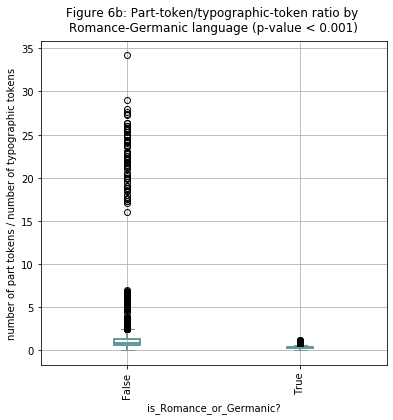

In [55]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "is_Romance_or_Germanic?", rot = 90,
xlabel = "is_Romance_or_Germanic?", ylabel = "number of part tokens / number of typographic tokens",
title = "Figure 6b: Part-token/typographic-token ratio by \nRomance-Germanic language (p-value < 0.001)",
figsize=(6,6),
figure_name = "figure6b_part_tokens_romance_germanic")


In [56]:
results_family_languages_parts_df = functions.test_differences_columns(metadata, "family of languages", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [57]:
results_family_languages_parts_df.loc[(results_family_languages_parts_df["value1"] == "Germanic") | (results_family_languages_parts_df["value2"] == "Romance") ].sort_values(by="pvalue")

value1                value2         pvalue   statistic  \
52         Balto-Slavic               Romance   0.000000e+00   64.126761   
147            Germanic          Sino-Tibetan   0.000000e+00  114.148231   
118            Egyptian               Romance   0.000000e+00 -124.480109   
132         Finno-Ugric               Romance  2.052970e-248   83.658730   
140            Germanic         Indo-European  1.264401e-112  -27.698735   
145            Germanic               Romance  3.611005e-111  -22.803032   
157       Indo-European               Romance   3.192760e-98   25.096648   
33         Austronesian               Romance   6.770483e-89   27.857365   
146            Germanic               Semitic   1.000009e-79  -23.786284   
143            Germanic              Koreanic   6.428549e-72  -85.856677   
187            Koreanic               Romance   6.185961e-71   79.166756   
141            Germanic          Indo-Iranian   9.700190e-69  -30.580054   
168        Indo-Iranian               Romance   4.685815e-63   27.659681   
103           Dravidian               Romance   1.104402e-62   68.251631   
152            Germanic  constructed language   7.608739e-59  -27.507779   
150            Germanic               Turkic    8.901114e-58  -28.410787   
148            Germanic                   Tai   2.725518e-54  -51.260826   
149            Germanic      Trans–New Guinea   1.460073e-35  -30.347505   
70                Bantu               Romance   2.016972e-34   64.728405   
142            Germanic    Jivaroan languages   1.952593e-32  -72.652352   
178  Jivaroan languages               Romance   5.397244e-32   67.684110   
144            Germanic      Language isolate   1.707352e-29  -55.848259   
195    Language isolate               Romance   1.011921e-28   50.587815   
87               Celtic               Romance   4.996503e-07   26.699598   
151            Germanic                Vietic   7.087393e-06    4.616484   
13                Algic               Romance            NaN         NaN   

     mean_value_1  mean_value_2  median_value_1  median_value_2 significance  
52       0.757416      0.347366        0.750000        0.294118          ***  
147      0.264638      0.000000        0.216216        0.000000          ***  
118      0.000000      0.347366        0.000000        0.294118          ***  
132      0.908163      0.347366        0.913043        0.294118          ***  
140      0.264638      1.155275        0.216216        0.792857          ***  
145      0.264638      0.347366        0.216216        0.294118          ***  
157      1.155275      0.347366        0.792857        0.294118          ***  
33       0.633659      0.347366        0.591168        0.294118          ***  
146      0.264638      3.059833        0.216216        1.312500          ***  
143      0.264638      1.417316        0.216216        1.414216          ***  
187      1.417316      0.347366        1.414216        0.294118          ***  
141      0.264638      1.143057        0.216216        1.263158          ***  
168      1.143057      0.347366        1.263158        0.294118          ***  
103      3.070656      0.347366        3.000000        0.294118          ***  
152      0.264638      0.580042        0.216216        0.525063          ***  
150      0.264638      1.557273        0.216216        1.666667          ***  
148      0.264638     22.488546        0.216216       22.416667          ***  
149      0.264638      1.037140        0.216216        1.026376          ***  
70       0.923929      0.347366        0.920807        0.294118          ***  
142      0.264638      1.542154        0.216216        1.545455          ***  
178      1.542154      0.347366        1.545455        0.294118          ***  
144      0.264638      1.182266        0.216216        1.176471          ***  
195      1.182266      0.347366        1.176471        0.294118          ***  
87       0.694313      0.347366        0.707889        0.294118     

### English

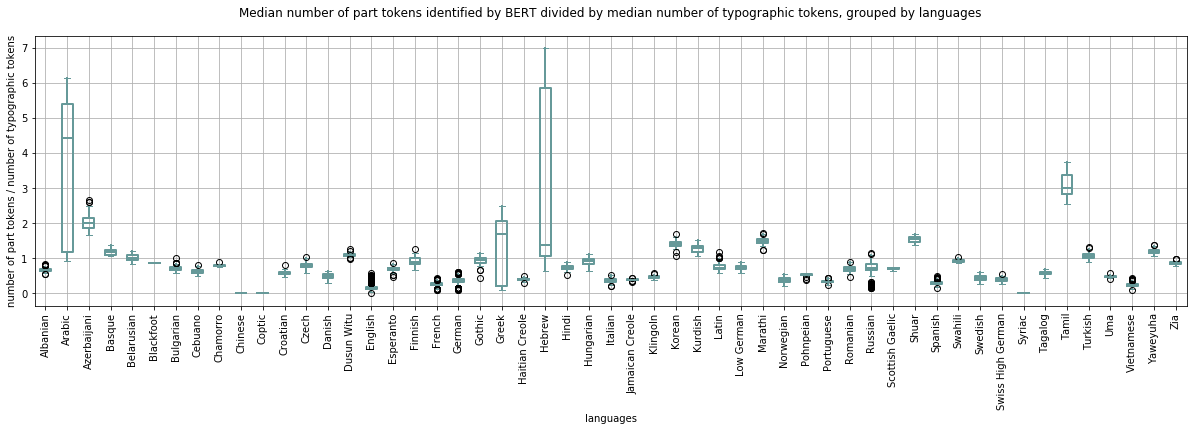

In [58]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "language", rot = 90, xlabel = "languages", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens, grouped by languages", figure_name = "part_tokens_typographic_tokens_languages")

In [59]:
results_languages_parts_df = functions.test_differences_columns(metadata, "language", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [60]:
results_english_parts_fewer_df = results_languages_parts_df.loc[((results_languages_parts_df["value1"] == "English") & (results_languages_parts_df["mean_value_1"] < results_languages_parts_df["mean_value_2"]) )
|
((results_languages_parts_df["value2"] == "English") & (results_languages_parts_df["mean_value_2"] < results_languages_parts_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [61]:
results_english_parts_fewer_df

value1             value2         pvalue   statistic  mean_value_1  \
715      English            Spanish   0.000000e+00  -72.102018      0.159967   
693      English             German   0.000000e+00  -77.830551      0.159967   
692      English             French   0.000000e+00  -49.627043      0.159967   
572        Czech            English  5.309654e-286  127.982484      0.790465   
705      English              Latin  1.195005e-279 -107.114621      0.159967   
700      English            Italian  1.329540e-230  -63.086403      0.159967   
14      Albanian            English  3.540960e-147  108.497533      0.664876   
712      English            Russian  4.497598e-146  -49.042789      0.159967   
357      Cebuano            English  2.040604e-123   81.282531      0.617788   
691      English            Finnish  1.620574e-121  -86.618540      0.159967   
699      English          Hungarian  3.067198e-120  -84.870711      0.159967   
711      English           Romanian  8.339694e-117  -77.019230      0.159967   
695      English              Greek  7.412959e-112  -29.201387      0.159967   
710      English         Portuguese   9.634717e-98  -46.509215      0.159967   
612       Danish            English   1.509012e-88   49.067045      0.481166   
311    Bulgarian            English   8.712867e-88   74.239563      0.714378   
717      English            Swedish   4.476181e-81  -41.446982      0.159967   
707      English            Marathi   1.523894e-76 -108.555336      0.159967   
703      English             Korean   2.006581e-72  -94.630705      0.159967   
702      English           Klingoln   2.465593e-71  -68.723523      0.159967   
216   Belarusian            English   1.105358e-69   83.894524      1.020240   
723      English            Turkish   1.392736e-68  -83.604909      0.159967   
708      English          Norwegian   3.189245e-67  -32.720859      0.159967   
698      English              Hindi   4.757226e-65  -69.462841      0.159967   
721      English              Tamil   3.107596e-64  -73.088809      0.159967   
720      English            Tagalog   4.628872e-63  -62.197810      0.159967   
696      English     Haitian Creole   1.138305e-62  -53.314950      0.159967   
117  Azerbaijani            English   5.591627e-62   67.177467      2.042516   
690      English          Esperanto   3.330905e-61  -61.308592      0.159967   
531     Croatian            English   3.894007e-58   54.198768      0.581428   
697      English             Hebrew   2.796703e-56  -20.513988      0.159967   
722      English               Thai   2.028663e-54  -51.502764      0.159967   
706      English         Low German   1.098210e-49  -53.841830      0.159967   
718      English  Swiss High German   6.182322e-45  -33.798358      0.159967   
66        Arabic            English   3.564235e-34   16.710533      3.294676   
716      English            Swahili   4.586086e-34  -89.277645      0.159967   
727      English                Zia   9.550411e-34  -79.814887      0.159967   
651   Dusun Witu            English   6.639609e-33   77.632905      1.090570   
725      English         Vietnamese   7.709983e-33  -15.475702      0.159967   
714      English              Shuar   8.533815e-33  -79.080233      0.159967   
701      English    Jamaican Creole   2.006283e-30  -48.799215      0.159967   
726      English           Yaweyuha   2.248073e-30  -63.718742      0.159967   
167       Basque            English   3.457350e-30   62.650092      1.182266   
724      English                Uma   7.568173e-29  -49.028531      0.159967   
709      English          Pohnpeian   1.542028e-28  -46.599471      0.159967   
704      English            Kurdish   3.927402e-28  -52.765051      0.159967   
694      English             Gothic   6.520720e-23  -28.687407      0.159967   
713      English    Scottish Gaelic   1.125559e-07  -41.886777      0.159967   
402     Chamorro            English   4.090468e-07   33.363098      0.796453   
264    Bla

In [62]:
results_english_parts_fewer_df.shape

(50, 9)

In [63]:
results_english_parts_more_df = results_languages_parts_df.loc[((results_languages_parts_df["value1"] == "English") & (results_languages_parts_df["mean_value_1"] >= results_languages_parts_df["mean_value_2"]) )
|
((results_languages_parts_df["value2"] == "English") & (results_languages_parts_df["mean_value_2"] >= results_languages_parts_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [64]:
results_english_parts_more_df

value1   value2  pvalue   statistic  mean_value_1  mean_value_2  \
446  Chinese  English     0.0 -123.798373      0.000000      0.159967   
489   Coptic  English     0.0 -123.798373      0.000000      0.159967   
719  English   Syriac     0.0  123.798373      0.159967      0.000000   

     median_value_1  median_value_2 significance  
446        0.000000        0.153846          ***  
489        0.000000        0.153846          ***  
719        0.153846        0.000000          ***

In [65]:
results_english_parts_fewer_df

value1             value2         pvalue   statistic  mean_value_1  \
715      English            Spanish   0.000000e+00  -72.102018      0.159967   
693      English             German   0.000000e+00  -77.830551      0.159967   
692      English             French   0.000000e+00  -49.627043      0.159967   
572        Czech            English  5.309654e-286  127.982484      0.790465   
705      English              Latin  1.195005e-279 -107.114621      0.159967   
700      English            Italian  1.329540e-230  -63.086403      0.159967   
14      Albanian            English  3.540960e-147  108.497533      0.664876   
712      English            Russian  4.497598e-146  -49.042789      0.159967   
357      Cebuano            English  2.040604e-123   81.282531      0.617788   
691      English            Finnish  1.620574e-121  -86.618540      0.159967   
699      English          Hungarian  3.067198e-120  -84.870711      0.159967   
711      English           Romanian  8.339694e-117  -77.019230      0.159967   
695      English              Greek  7.412959e-112  -29.201387      0.159967   
710      English         Portuguese   9.634717e-98  -46.509215      0.159967   
612       Danish            English   1.509012e-88   49.067045      0.481166   
311    Bulgarian            English   8.712867e-88   74.239563      0.714378   
717      English            Swedish   4.476181e-81  -41.446982      0.159967   
707      English            Marathi   1.523894e-76 -108.555336      0.159967   
703      English             Korean   2.006581e-72  -94.630705      0.159967   
702      English           Klingoln   2.465593e-71  -68.723523      0.159967   
216   Belarusian            English   1.105358e-69   83.894524      1.020240   
723      English            Turkish   1.392736e-68  -83.604909      0.159967   
708      English          Norwegian   3.189245e-67  -32.720859      0.159967   
698      English              Hindi   4.757226e-65  -69.462841      0.159967   
721      English              Tamil   3.107596e-64  -73.088809      0.159967   
720      English            Tagalog   4.628872e-63  -62.197810      0.159967   
696      English     Haitian Creole   1.138305e-62  -53.314950      0.159967   
117  Azerbaijani            English   5.591627e-62   67.177467      2.042516   
690      English          Esperanto   3.330905e-61  -61.308592      0.159967   
531     Croatian            English   3.894007e-58   54.198768      0.581428   
697      English             Hebrew   2.796703e-56  -20.513988      0.159967   
722      English               Thai   2.028663e-54  -51.502764      0.159967   
706      English         Low German   1.098210e-49  -53.841830      0.159967   
718      English  Swiss High German   6.182322e-45  -33.798358      0.159967   
66        Arabic            English   3.564235e-34   16.710533      3.294676   
716      English            Swahili   4.586086e-34  -89.277645      0.159967   
727      English                Zia   9.550411e-34  -79.814887      0.159967   
651   Dusun Witu            English   6.639609e-33   77.632905      1.090570   
725      English         Vietnamese   7.709983e-33  -15.475702      0.159967   
714      English              Shuar   8.533815e-33  -79.080233      0.159967   
701      English    Jamaican Creole   2.006283e-30  -48.799215      0.159967   
726      English           Yaweyuha   2.248073e-30  -63.718742      0.159967   
167       Basque            English   3.457350e-30   62.650092      1.182266   
724      English                Uma   7.568173e-29  -49.028531      0.159967   
709      English          Pohnpeian   1.542028e-28  -46.599471      0.159967   
704      English            Kurdish   3.927402e-28  -52.765051      0.159967   
694      English             Gothic   6.520720e-23  -28.687407      0.159967   
713      English    Scottish Gaelic   1.125559e-07  -41.886777      0.159967   
402     Chamorro            English   4.090468e-07   33.363098      0.796453   
264    Bla

In [66]:
functions.test_differences_columns(metadata, "is_English?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")




value1  value2         pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  2.530975e-195  30.568195      0.836194      0.159967   

   median_value_1  median_value_2 significance  
0        0.387993        0.153846          ***

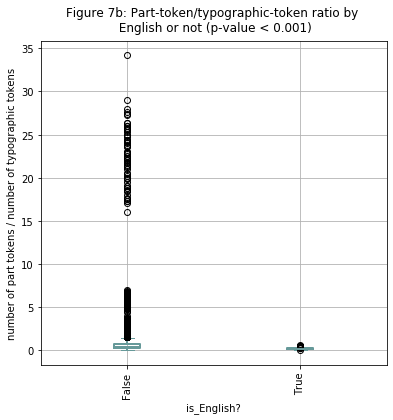

In [67]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "is_English?", rot = 90,
xlabel = "is_English?", ylabel = "number of part tokens / number of typographic tokens",
title = "Figure 7b: Part-token/typographic-token ratio by \n English or not (p-value < 0.001)",
figsize=(6,6),
figure_name = "figure7b_part_tokens_romance_germanic")


### Writing Systems

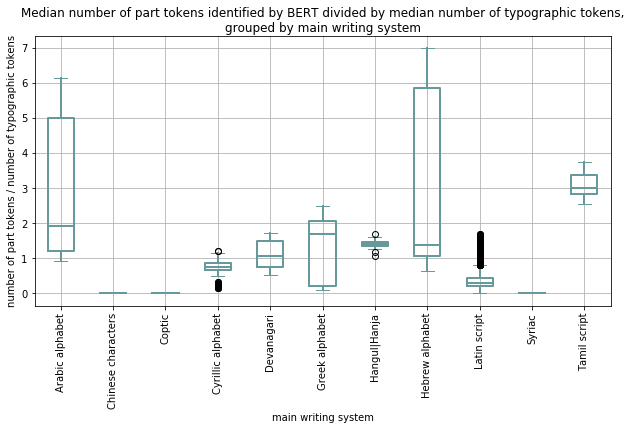

In [68]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]< 8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "main writing system",
rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens",
title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system",
figure_name = "part_tokens_typographic_tokens_alphabet",
figsize=(10,5))

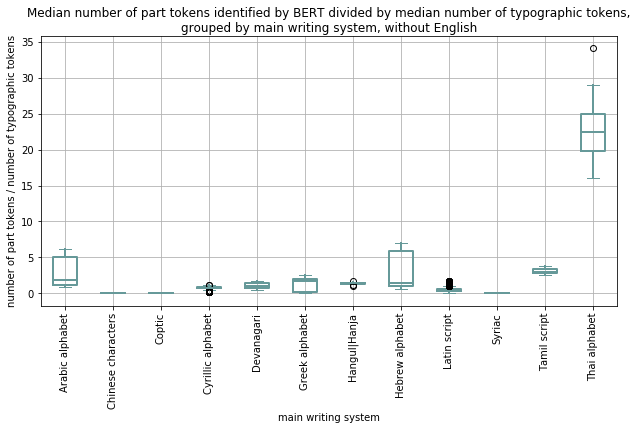

In [69]:
functions.plot_boxplots_by(metadata.loc[metadata["language"] != "English"], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "main writing system", rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system, without English", figure_name = "part_tokens_typographic_tokens_alphabet_wo_English",
figsize=(10,5))


In [70]:
results_writing_parts_df = functions.test_differences_columns(metadata, "main writing system", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [71]:
results_writing_parts_df

value1              value2        pvalue  statistic  \
0   Arabic alphabet  Chinese characters  3.208784e-58  22.141933   
1   Arabic alphabet              Coptic  3.208784e-58  22.141933   
2   Arabic alphabet   Cyrillic alphabet  2.200079e-38  15.807328   
3   Arabic alphabet          Devanagari  3.923702e-28  12.445962   
4   Arabic alphabet      Greek alphabet  1.286059e-23  11.040819   
..              ...                 ...           ...        ...   
61     Latin script        Tamil script  2.394257e-62 -67.633526   
62     Latin script       Thai alphabet  3.715469e-54 -51.010313   
63           Syriac        Tamil script  1.221794e-65 -77.146269   
64           Syriac       Thai alphabet  1.291157e-54 -51.871971   
65     Tamil script       Thai alphabet  4.632369e-51 -44.601631   

    mean_value_1  mean_value_2  median_value_1  median_value_2 significance  
0       2.681856      0.000000        1.906926        0.000000          ***  
1       2.681856      0.000000        1.906926        0.000000          ***  
2       2.681856      0.761807        1.906926        0.739130          ***  
3       2.681856      1.116810        1.906926        1.072751          ***  
4       2.681856      1.279284        1.906926        1.684962          ***  
..           ...           ...             ...             ...          ...  
61      0.373185      3.070656        0.303030        3.000000          ***  
62      0.373185     22.488546        0.303030       22.416667          ***  
63      0.000000      3.070656        0.000000        3.000000          ***  
64      0.000000     22.488546        0.000000       22.416667          ***  
65      3.070656     22.488546        3.000000       22.416667          ***  

[66 rows x 9 columns]

In [72]:
results_writing_parts_df.loc[(results_writing_parts_df["value1"] == "Latin script") | (results_writing_parts_df["value2"] == "Latin script") ].sort_values(by="pvalue")

value1         value2         pvalue   statistic  \
17  Chinese characters   Latin script   0.000000e+00 -147.253510   
26              Coptic   Latin script   0.000000e+00 -147.253510   
60        Latin script         Syriac   0.000000e+00  147.253510   
34   Cyrillic alphabet   Latin script  8.377691e-166   40.960830   
47      Greek alphabet   Latin script   1.648745e-84   23.600687   
52        Hangul|Hanja   Latin script   1.653226e-69   77.546510   
61        Latin script   Tamil script   2.394257e-62  -67.633526   
62        Latin script  Thai alphabet   3.715469e-54  -51.010313   
56     Hebrew alphabet   Latin script   1.987570e-51   19.100375   
7      Arabic alphabet   Latin script   1.041637e-48   19.056673   
41          Devanagari   Latin script   5.980212e-46   21.942881   

    mean_value_1  mean_value_2  median_value_1  median_value_2 significance  
17      0.000000      0.373185        0.000000        0.303030          ***  
26      0.000000      0.373185        0.000000        0.303030          ***  
60      0.373185      0.000000        0.303030        0.000000          ***  
34      0.761807      0.373185        0.739130        0.303030          ***  
47      1.279284      0.373185        1.684962        0.303030          ***  
52      1.417316      0.373185        1.414216        0.303030          ***  
61      0.373185      3.070656        0.303030        3.000000          ***  
62      0.373185     22.488546        0.303030       22.416667          ***  
56      3.258496      0.373185        1.384615        0.303030          ***  
7       2.681856      0.373185        1.906926        0.303030          ***  
41      1.116810      0.373185        1.072751        0.303030          ***

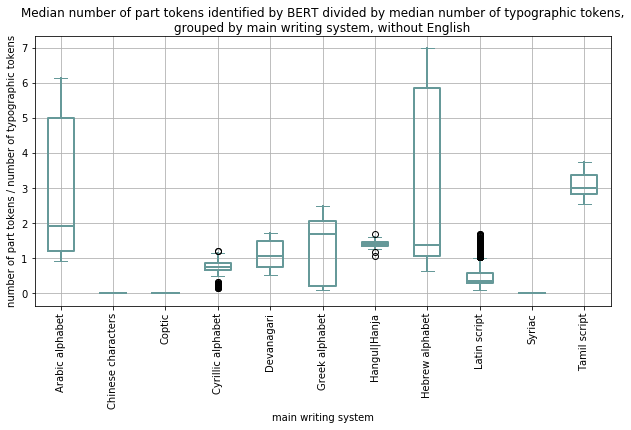

In [73]:
functions.plot_boxplots_by(metadata.loc[(metadata["language"] != "English") & (metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8) ], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "main writing system", rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system, without English", figure_name = "part_tokens_typographic_tokens_alphabet_wo_English",
figsize=(10,5))


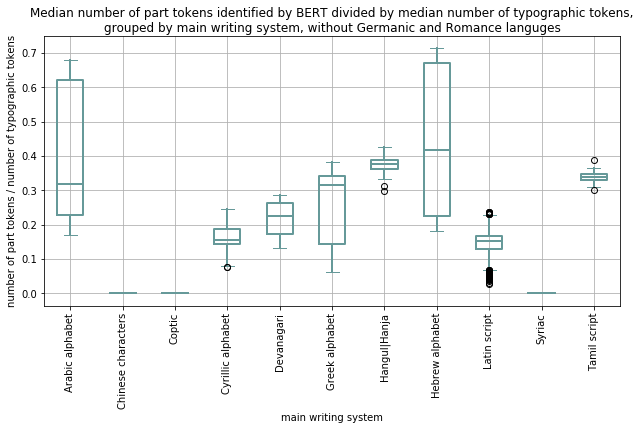

In [74]:
functions.plot_boxplots_by(metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"])) & (metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8)], "bert_multilingual_cased_count_parts_tokens_median/characters_count_median", "main writing system", rot = 90, xlabel = "main writing system", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,\ngrouped by main writing system, without Germanic and Romance languges", figure_name = "part_tokens_typographic_tokens_alphabet_wo_germanic_romance",
figsize=(10,5))


In [75]:
metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) & (metadata["main writing system"].isin(["Cyrillic alphabet","Latin script"]) )]

index                                               path language_code  \
0        232  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
1          7  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
5        235  ./../data/bibles/transformed_xml_with_year\SF_...           BEL   
6        151  ./../data/bibles/transformed_xml_with_year\SF_...           BUL   
7         10  ./../data/bibles/transformed_xml_with_year\SF_...           CEB   
...      ...                                                ...           ...   
11276    113  ./../data/bibles/transformed_xml_with_year\SF_...           VIE   
11277    199  ./../data/bibles/transformed_xml_with_year\SF_...           WIU   
11278    123  ./../data/bibles/transformed_xml_with_year\SF_...           XKL   
11279    200  ./../data/bibles/transformed_xml_with_year\SF_...           YBY   
11280    196  ./../data/bibles/transformed_xml_with_year\SF_...           ZIA   

                                    title  year  number_verses_translation  \
0                     Albanian Bible Tosk     0                      31102   
1                        Albanian Version     0                      31102   
5                        Belarusian Bible     0                      31169   
6              Veren's Contemporary Bible     0                      31101   
7      Cebuano Ang Biblia (Bugna Version)     0                      31102   
...                                   ...   ...                        ...   
11276                  Vietnamese Version     0                      31102   
11277                   The New Testament     0                       7817   
11278                     Klingon Version     0                      31083   
11279                   The New Testament     0                       7482   
11280                              Zia NT     0                       7844   

       number_chapters_translation  number_books_translation   source  \
0                             1189                        66  zefania   
1                             1189                        66  zefania   
5                             1190                        66  zefania   
6                             1189                        66  zefania   
7                             1189                        66  zefania   
...                            ...                       ...      ...   
11276                         1189                        66  zefania   
11277                          260                        27  zefania   
11278                         1189                        66  zefania   
11279                          241                        27  zefania   
11280                          260                        27  zefania   

                                   file_name_translation  ...  \
0      SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...  ...   
1              SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)  ...   
5              SF_2021-01-31_BEL_BELA_(Belarusian Bible)  ...   
6      SF_2010-01-10_BUL_BULVEREN_(VEREN'S CONTEMPORA...  ...   
7      SF_2009-01-20_CEB_CEB-B_(CEBUANO ANG BIBLIA (B...  ...   
...                                                  ...  ...   
11276         SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION)  ...   
11277        SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT)  ...   
11278        SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION)  ...   
11279        SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT)  ...   
11280                   SF_2014-04-22_ZIA_ZIANT_(ZIA NT)  ...   

      bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median  \
0                                               0.629630                           
1                                               0.642857                           
5                                               0.954545                           
6                                               0.625000                           
7                  

In [76]:
metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) & (metadata["main writing system"].isin(["Latin script"]) )]["language"].value_counts()

Czech              291
Cebuano            132
Finnish            132
Albanian           132
Vietnamese         132
Hungarian          132
Tagalog             66
Klingoln            66
Croatian            66
Esperanto           66
Turkish             65
Pohnpeian           28
Yaweyuha            27
Zia                 27
Shuar               27
Uma                 27
Basque              27
Dusun Witu          27
Swahili             26
Scottish Gaelic      6
Chamorro             6
Blackfoot            1
Name: language, dtype: int64

In [77]:
results_writing_cyrilic_latin_wo_germanic_romance_parts_df = functions.test_differences_columns(metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) & (metadata["main writing system"].isin(["Cyrillic alphabet","Latin script"]) )], "main writing system", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


In [78]:
results_writing_cyrilic_latin_wo_germanic_romance_parts_df

value1        value2    pvalue  statistic  mean_value_1  \
0  Cyrillic alphabet  Latin script  0.033796   2.125432      0.761807   

   mean_value_2  median_value_1  median_value_2 significance  
0      0.737643         0.73913        0.727273            *

In [79]:
functions.test_differences_columns(metadata, "in_Latin_script?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  2.515408e-79  19.710646      2.149453      0.373185   

   median_value_1  median_value_2 significance  
0        1.060662         0.30303          ***

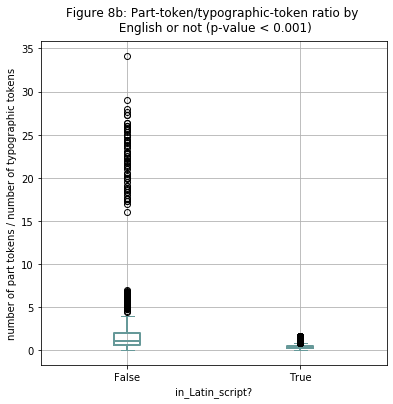

In [190]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "in_Latin_script?", 
xlabel = "in_Latin_script?", ylabel = "number of part tokens / number of typographic tokens",
title = "Figure 8b: Part-token/typographic-token ratio by \n English or not (p-value < 0.001)",
figsize=(6,6),
figure_name = "figure8b_part_tokens_english")





### Part of Training Material in BERT

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


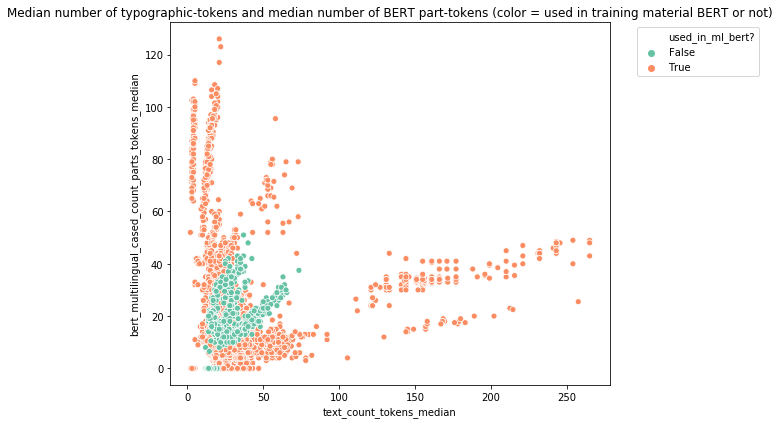

In [81]:
functions.plot_scatter_w_colors(metadata.loc[(metadata["text_count_tokens_median"] < 300)].sort_values(by="used_in_ml_bert?", ascending=False),
        column_x = "text_count_tokens_median", column_y = "bert_multilingual_cased_count_parts_tokens_median", palette= "Set2",
        column_color = "used_in_ml_bert?", title = "Median number of typographic-tokens and median number of BERT part-tokens (color = used in training material BERT or not)", outdir = "./../visualizations/", figure_name = "median_tokens_part_tokens_training")

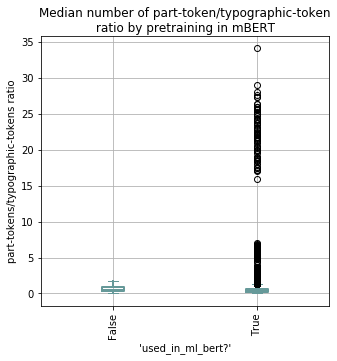

In [82]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "part-tokens/typographic-tokens ratio",
title = "Median number of part-token/typographic-token\n ratio by pretraining in mBERT ",
figure_name = "part_tokens_bert", figsize = (5,5))


In [83]:
results_in_bert_parts_df = functions.test_differences_columns(metadata, "used_in_ml_bert?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


In [84]:
results_in_bert_parts_df

value1  value2    pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  0.194699  -1.297237      0.662981      0.696531   

   median_value_1  median_value_2 significance  
0        0.522774        0.317073

In [85]:
functions.test_differences_columns(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8], "used_in_ml_bert?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  4.462807e-07   5.094952      0.662981      0.562226   

   median_value_1  median_value_2 significance  
0        0.522774        0.314286          ***

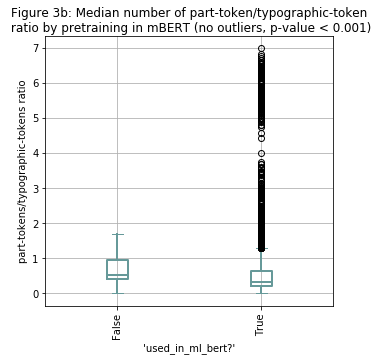

In [86]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 8], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "part-tokens/typographic-tokens ratio",
title = "Figure 3b: Median number of part-token/typographic-token\n ratio by pretraining in mBERT (no outliers, p-value < 0.001)",
figure_name = "figure3b_part_tokens_bert_2", figsize = (5,5))


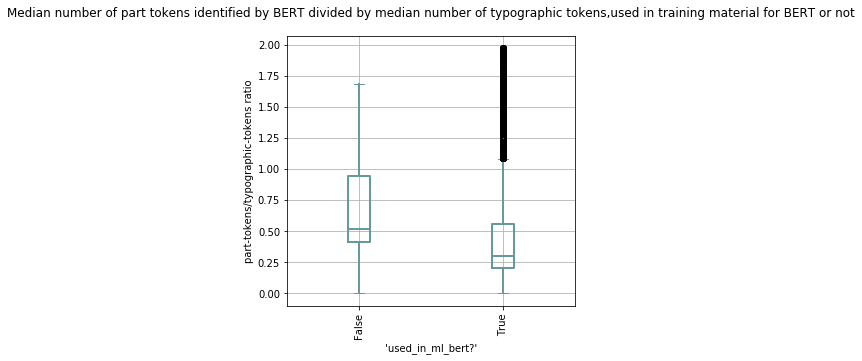

In [87]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 2], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "part-tokens/typographic-tokens ratio",
title = "Median number of part tokens identified by BERT divided by median number of typographic tokens,used in training material for BERT or not",
figure_name = "part_tokens_bert_2", figsize = (5,5))


In [88]:
functions.test_differences_columns(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 2], "used_in_ml_bert?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")


value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  3.344415e-34  13.089851      0.662981      0.422046   

   median_value_1  median_value_2 significance  
0        0.522774        0.304348          ***

### Correlation with Wikipedia's Size

In [89]:
languages_mean_df.head()

language         macro family of languages main writing system  \
0     Albanian  Albanian-Slavic-Romance-Germanic        Latin script   
2       Arabic                           Semitic     Arabic alphabet   
4  Azerbaijani                           Turkic      Arabic alphabet   
5   Belarusian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
6    Bulgarian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   

        index        year  number_verses_translation  \
0  119.500000    0.000000               31102.000000   
2   85.083969    0.000000               31101.496183   
4  162.000000    0.000000               31102.000000   
5  235.000000    0.000000               31169.000000   
6  147.806452  555.677419               24381.774194   

   number_chapters_translation  number_books_translation  \
0                  1189.000000                 66.000000   
2                  1189.000000                 66.000000   
4                  1189.000000                 66.000000   
5                  1190.000000                 66.000000   
6                   919.290323                 54.677419   

   text_count_tokens_mean  text_count_tokens_median  ...  \
0               28.675941                 27.553030  ...   
2               16.457412                 15.812977  ...   
4               18.533909                 17.810606  ...   
5               23.020679                 22.121212  ...   
6               24.135792                 23.268817  ...   

   bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean  \
0                                           1.678507                  
2                                           4.326791                  
4                                           3.192559                  
5                                           2.009111                  
6                                           1.717894                  

   bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean  \
0                                           0.664223                        
2                                           3.283510                        
4                                           2.057189                        
5                                           1.023780                        
6                                           0.719718                        

   bert_multilingual_cased_count_unks_mean/text_count_tokens_mean  \
0                                           0.009851                
2                                           0.000000                
4                                           0.000061                
5                                           0.006454                
6                                           0.004006                

   used_in_ml_bert?  wikipedia_nr_articles_2021  is_English?  \
0              True                     84162.0        False   
2              True                   1140422.0        False   
4              True                    179494.0        False   
5              True                    209937.0        False   
6              True                    275867.0        False   

   is_Romance_or_Germanic?  in_Latin_script?  \
0                    False              True   
2                    False             False   
4                    False             False   
5                    False             False   
6                    False             False   

   bert_multilingual_cased_count_parts_tokens_median/characters_count_median  \
0                                           0.144235                           
2                                           0.437399                           
4                                           0.326724                           
5                                           0.212890                           
6                                           0.152732                           

   bert_multilingual_cased_count_parts_tokens_median/t

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


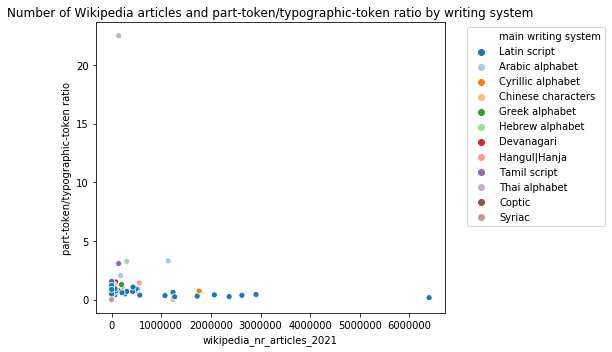

In [90]:
functions.plot_scatter_w_colors(languages_mean_df,
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "part-token/typographic-token ratio",
        column_color = "main writing system", title = "Number of Wikipedia articles and part-token/typographic-token ratio by writing system", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_writing_system")

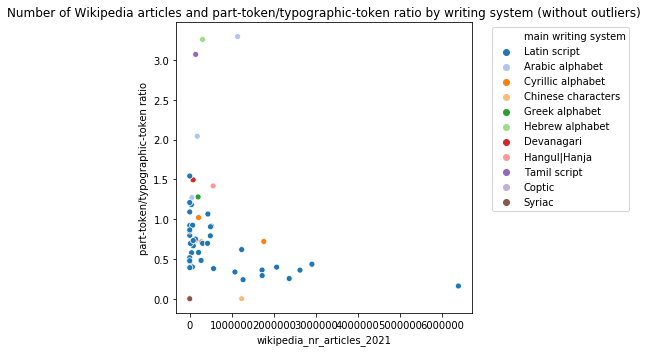

In [91]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "part-token/typographic-token ratio",
        column_color = "main writing system", title = "Number of Wikipedia articles and part-token/typographic-token ratio by writing system (without outliers)", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_writing_system_wo_outliers")

In [92]:
r, p = stats.pearsonr(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5]["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"], languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5]["wikipedia_nr_articles_2021"])
print(r, p)

-0.24772742852551155 0.07370015805635263


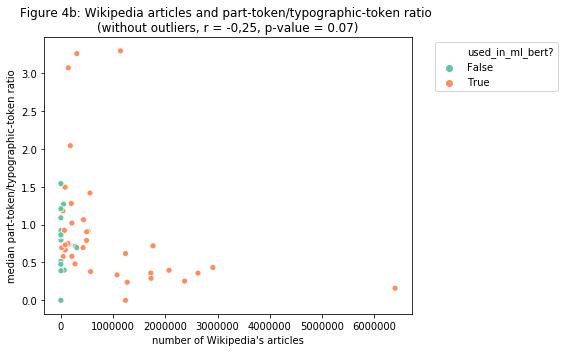

In [93]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5),
        ylabel= "median part-token/typographic-token ratio", xlabel = "number of Wikipedia's articles", palette = "Set2",
        column_color = "used_in_ml_bert?", title = "Figure 4b: Wikipedia articles and part-token/typographic-token ratio \n(without outliers, r = -0,25, p-value = 0.07)",
        outdir = "./../visualizations/", figure_name = "figure4b_wikipedia_ratio_training_wo_outliers")

In [94]:
languages_mean_df.loc[languages_mean_df["used_in_ml_bert?"] == False][["language","bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]].sort_values(by="bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

language  \
5877           Coptic   
6052           Syriac   
6004  Jamaican Creole   
89     Haitian Creole   
152          Klingoln   
6057              Uma   
2822        Pohnpeian   
49          Esperanto   
2713         Chamorro   
5867        Blackfoot   
6063              Zia   
2337           Gothic   
6060       Dusun Witu   
6062         Yaweyuha   
5876          Kurdish   
6028            Shuar   

      bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median  
5877                                           0.000000                           
6052                                           0.000000                           
6004                                           0.390326                           
89                                             0.399703                           
152                                            0.463832                           
6057                                           0.477244                           
2822                                           0.515439                           
49                                             0.696253                           
2713                                           0.796453                           
5867                                           0.850000                           
6063                                           0.865204                           
2337                                           0.920690                           
6060                                           1.090570                           
6062                                           1.209075                           
5876                                           1.271375                           
6028                                           1.542154

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


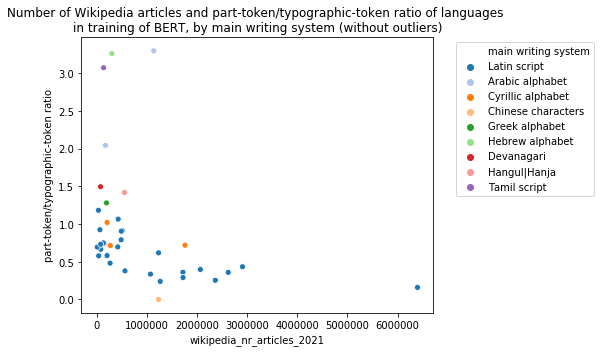

In [95]:
functions.plot_scatter_w_colors(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", figsize= (8,5), ylabel= "part-token/typographic-token ratio",
        column_color = "main writing system", title = "Number of Wikipedia articles and part-token/typographic-token ratio of languages \nin training of BERT, by main writing system (without outliers)", outdir = "./../visualizations/", figure_name = "wikipedia_ratio_training_only_training_bert_wo_outliers")

In [96]:
r, p = stats.pearsonr(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"], languages_mean_df["wikipedia_nr_articles_2021"])
print(r, p)

-0.11810671929697292 0.39500363411318845


In [97]:
languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )].shape

(37, 60)

In [98]:
r, p = stats.pearsonr(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"], languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"]<5) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["wikipedia_nr_articles_2021"])
print(r, p)


-0.3396104302242528 0.0397406317251419


## Older Things

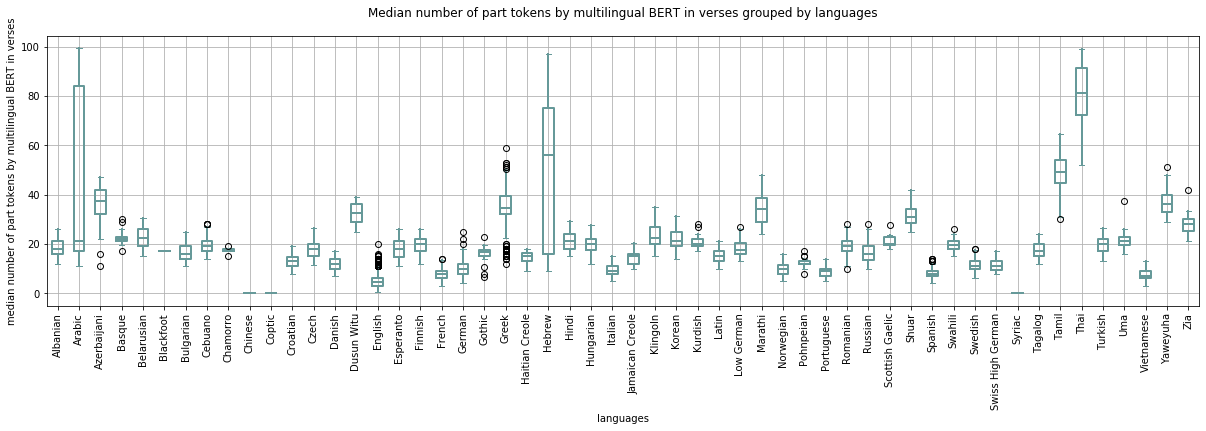

In [99]:
functions.plot_boxplots_by(metadata.loc[metadata["bert_multilingual_cased_count_parts_tokens_median"]<100], "bert_multilingual_cased_count_parts_tokens_median", "language", rot = 90, xlabel = "languages", ylabel = "median number of part tokens by multilingual BERT in verses", title = "Median number of part tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_median_part_tokens")

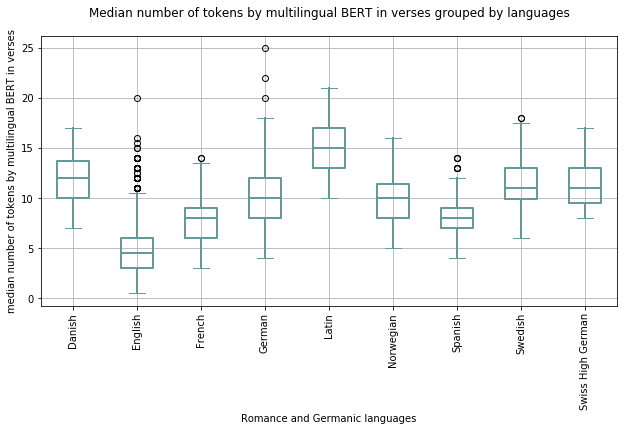

In [100]:
functions.plot_boxplots_by(metadata.loc[(metadata["language_code"].isin(["GER", "ENG", "NL_", "NOR", "DAN", "SWE", "FRE", "LAT", "SPA"])) & (metadata["bert_multilingual_cased_count_parts_tokens_median"] < 100)], "bert_multilingual_cased_count_parts_tokens_median", "language", rot = 90, xlabel = "Romance and Germanic languages", ylabel = "median number of tokens by multilingual BERT in verses", title = "Median number of tokens by multilingual BERT in verses grouped by languages", figure_name = "languages_multilingual_bert_parts_median_germanic_romance", figsize=(10,5))


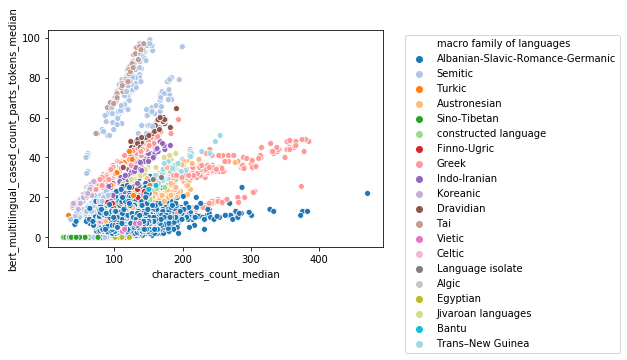

In [101]:
sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "macro family of languages", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


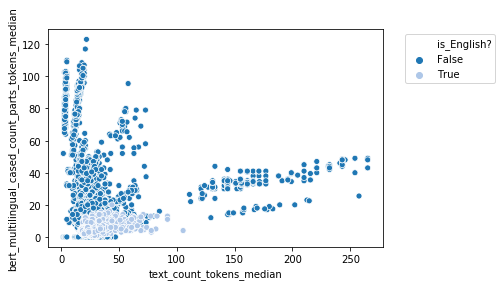

In [102]:
sns.scatterplot(x ="text_count_tokens_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "is_English?", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_median"] < 125) ].sort_values(by="is_English?"),
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


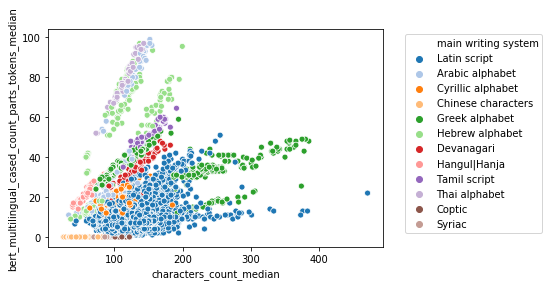

In [103]:
sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "main writing system", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


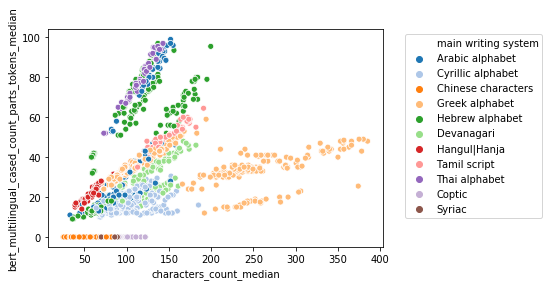

In [104]:



sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "main writing system", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) & (metadata["main writing system"] != "Latin script")],
#
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')




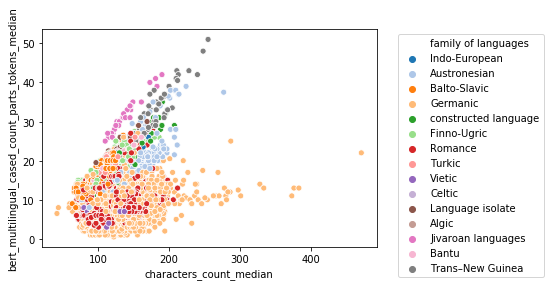

In [105]:
sns.scatterplot(x ="characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "family of languages", data = metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_mean"] < 100) & (metadata["main writing system"] == "Latin script")],
palette = "tab20", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


### Calculate regression line

In [106]:
from scipy import stats

results_regression_language_name = []

for language in metadata["language"].unique().tolist():
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(
        metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_median"] < 100) & (metadata["language"] == language)]["characters_count_median"],
        metadata.loc[(metadata["bert_multilingual_cased_count_parts_tokens_median"] < 100) & (metadata["language"] == language)]["bert_multilingual_cased_count_parts_tokens_median"],
        )
    results_regression_language_name.append([language, slope, intercept, rvalue, pvalue, stderr] )


C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid valu

In [107]:
results_regression_language_name_df = pd.DataFrame(results_regression_language_name, columns = ["language", "slope", "intercept", "rvalue", "pvalue", "stderr"])

In [108]:
results_regression_language_name_df

language     slope  intercept    rvalue         pvalue    stderr
0            Albanian  0.136166   0.992242  0.947686   2.489268e-66  0.004023
1              Arabic  1.026274 -55.848434  0.957259   1.033218e-62  0.029170
2         Azerbaijani  0.327435  -0.078680  0.969312   1.026314e-40  0.010380
3          Belarusian  0.197737   1.545566  0.961184   1.669820e-37  0.007095
4           Bulgarian  0.158983  -0.680331  0.898374   2.830116e-34  0.008148
5             Cebuano  0.104345   2.696504  0.900144   9.322358e-49  0.004429
6             Chinese  0.000000   0.000000  0.000000   1.000000e+00  0.000000
7               Czech  0.161433   0.489613  0.919559  2.960398e-119  0.004058
8              Danish  0.097787   0.722900  0.770243   3.507431e-26  0.007242
9             English  0.043818  -0.995332  0.604182  2.337988e-234  0.001191
10          Esperanto  0.161945  -1.799274  0.949820   5.195851e-34  0.006667
11            Finnish  0.137088   1.917769  0.908208   5.107695e-51  0.005541
12             French  0.060107  -0.498553  0.716704  3.081979e-187  0.001701
13             German  0.053237   2.717054  0.597776  4.011572e-128  0.001971
14              Greek  0.008574  33.674519  0.094776   3.038296e-02  0.003949
15     Haitian Creole  0.096260   1.160964  0.879790   2.401389e-22  0.006501
16             Hebrew  0.652944 -18.343507  0.810945   9.311555e-62  0.029388
17              Hindi  0.168888   0.473768  0.889976   1.660700e-23  0.010817
18          Hungarian  0.147328   2.450342  0.853154   1.486414e-38  0.007901
19            Italian  0.079632  -0.725043  0.802150   5.453405e-75  0.003283
20             Korean  0.384565  -0.607783  0.932136   6.199626e-30  0.018674
21              Latin  0.135480  -0.099977  0.930024  1.200033e-144  0.002956
22            Marathi  0.267642  -0.531872  0.972590   2.905110e-42  0.007998
23  Swiss High German  0.058537   3.250340  0.797463   1.119530e-15  0.005536
24          Norwegian  0.068069   1.845043  0.604957   2.483325e-14  0.007919
25         Portuguese  0.072358   0.097014  0.840981   1.739071e-36  0.004083
26           Romanian  0.143496   0.707722  0.882657   1.871548e-44  0.006702
27            Russian  0.084034   7.330581  0.502547   2.389330e-20  0.008431
28           Croatian  0.119958   0.861149  0.929109   2.389474e-29  0.005968
29            Spanish  0.056718   0.653420  0.755090  6.493144e-244  0.001357
30            Swedish  0.102101  -1.452704  0.815952   9.842695e-33  0.006345
31              Tamil  0.328023   1.434771  0.964603   9.203756e-39  0.011209
32            Tagalog  0.101912   1.816664  0.903259   3.337021e-25  0.006052
33               Thai  0.678478   0.717648  0.987029   3.505359e-46  0.014747
34            Turkish  0.155787   1.806116  0.921995   1.187847e-27  0.008243
35         Vietnamese  0.063380  -0.241230  0.585510   1.659179e-13  0.007696
36           Klingoln  0.158274  -0.466299  0.918911   1.504058e-27  0.008493
37             Gothic  0.195636  -1.607230  0.961230   3.348578e-17  0.010606
38    Scottish Gaelic  0.138940   2.995565  0.973151   1.071659e-03  0.016431
39           Chamorro  0.104928   5.956850  0.938616   5.536351e-03  0.019282
40         Low German  0.169287  -1.736440  0.805151   1.265609e-13  0.017128
41          Pohnpeian  0.118453   0.107630  0.886515   3.437661e-10  0.012125
42             Basque  0.167040   2.028524  0.966481   2.815936e-16  0.008875
43          Blackfoot       NaN        NaN  0.000000            NaN       NaN
44            Kurdish  0.158349   3.855329  0.841581   3.798477e-08  0.020326
45             Coptic  0.000000   0.000000  0.000000   1.000000e+00  0.000000
46    Jamaican Creole  0.101798   0.179302  0.963583   7.815094e-16  0.005650
47              Shuar  0.210566   2.315109  0.979785   5.437359e-19  0.008599
48            Swahili  0.150009   1.894130  0.959814   9.532834e-15  0.008953
49             Syriac  0.000000   0.000000  0.000000   1.000000e+00  0.000000
50                Uma  0.124974   0

In [109]:
results_regression_language_name_df.index = results_regression_language_name_df.language

In [110]:
colors = functions.get_colors_lt(cmap_name = "tab20")

In [111]:
metadata, color_dict = functions.add_color_column_based_on_str_column(metadata, colors = colors, column_name = "main writing system")

In [112]:
metadata[["language", "main writing system", "main writing system_colors"]]

language main writing system main writing system_colors
0         Albanian        Latin script                    #1f77b4
1         Albanian        Latin script                    #1f77b4
2           Arabic     Arabic alphabet                    #aec7e8
3           Arabic     Arabic alphabet                    #aec7e8
4      Azerbaijani     Arabic alphabet                    #aec7e8
...            ...                 ...                        ...
11276   Vietnamese        Latin script                    #1f77b4
11277   Dusun Witu        Latin script                    #1f77b4
11278     Klingoln        Latin script                    #1f77b4
11279     Yaweyuha        Latin script                    #1f77b4
11280          Zia        Latin script                    #1f77b4

[11281 rows x 3 columns]

In [113]:
results_regression_language_name_df.drop(columns="language", inplace=True)

In [114]:
results_regression_language_name_df = pd.merge(results_regression_language_name_df, metadata[["language", "main writing system", "main writing system_colors"]], left_on= "language", right_on="language", how='inner')

In [115]:
results_regression_language_name_df

language     slope  intercept    rvalue        pvalue    stderr  \
0      Albanian  0.136166   0.992242  0.947686  2.489268e-66  0.004023   
1      Albanian  0.136166   0.992242  0.947686  2.489268e-66  0.004023   
2      Albanian  0.136166   0.992242  0.947686  2.489268e-66  0.004023   
3      Albanian  0.136166   0.992242  0.947686  2.489268e-66  0.004023   
4      Albanian  0.136166   0.992242  0.947686  2.489268e-66  0.004023   
...         ...       ...        ...       ...           ...       ...   
11276       Zia  0.177324  -2.041445  0.984160  2.641490e-20  0.006389   
11277       Zia  0.177324  -2.041445  0.984160  2.641490e-20  0.006389   
11278       Zia  0.177324  -2.041445  0.984160  2.641490e-20  0.006389   
11279       Zia  0.177324  -2.041445  0.984160  2.641490e-20  0.006389   
11280       Zia  0.177324  -2.041445  0.984160  2.641490e-20  0.006389   

      main writing system main writing system_colors  
0            Latin script                    #1f77b4  
1            Latin script                    #1f77b4  
2            Latin script                    #1f77b4  
3            Latin script                    #1f77b4  
4            Latin script                    #1f77b4  
...                   ...                        ...  
11276        Latin script                    #1f77b4  
11277        Latin script                    #1f77b4  
11278        Latin script                    #1f77b4  
11279        Latin script                    #1f77b4  
11280        Latin script                    #1f77b4  

[11281 rows x 8 columns]

In [116]:
results_regression_language_name_df = results_regression_language_name_df.groupby("language").head(1)

In [117]:
results_regression_language_name_df.index = results_regression_language_name_df["language"]

In [118]:
results_regression_language_name_df

language     slope  intercept    rvalue  \
language                                                              
Albanian                    Albanian  0.136166   0.992242  0.947686   
Arabic                        Arabic  1.026274 -55.848434  0.957259   
Azerbaijani              Azerbaijani  0.327435  -0.078680  0.969312   
Belarusian                Belarusian  0.197737   1.545566  0.961184   
Bulgarian                  Bulgarian  0.158983  -0.680331  0.898374   
Cebuano                      Cebuano  0.104345   2.696504  0.900144   
Chinese                      Chinese  0.000000   0.000000  0.000000   
Czech                          Czech  0.161433   0.489613  0.919559   
Danish                        Danish  0.097787   0.722900  0.770243   
English                      English  0.043818  -0.995332  0.604182   
Esperanto                  Esperanto  0.161945  -1.799274  0.949820   
Finnish                      Finnish  0.137088   1.917769  0.908208   
French                        French  0.060107  -0.498553  0.716704   
German                        German  0.053237   2.717054  0.597776   
Greek                          Greek  0.008574  33.674519  0.094776   
Haitian Creole        Haitian Creole  0.096260   1.160964  0.879790   
Hebrew                        Hebrew  0.652944 -18.343507  0.810945   
Hindi                          Hindi  0.168888   0.473768  0.889976   
Hungarian                  Hungarian  0.147328   2.450342  0.853154   
Italian                      Italian  0.079632  -0.725043  0.802150   
Korean                        Korean  0.384565  -0.607783  0.932136   
Latin                          Latin  0.135480  -0.099977  0.930024   
Marathi                      Marathi  0.267642  -0.531872  0.972590   
Swiss High German  Swiss High German  0.058537   3.250340  0.797463   
Norwegian                  Norwegian  0.068069   1.845043  0.604957   
Portuguese                Portuguese  0.072358   0.097014  0.840981   
Romanian                    Romanian  0.143496   0.707722  0.882657   
Russian                      Russian  0.084034   7.330581  0.502547   
Croatian                    Croatian  0.119958   0.861149  0.929109   
Spanish                      Spanish  0.056718   0.653420  0.755090   
Swedish                      Swedish  0.102101  -1.452704  0.815952   
Tamil                          Tamil  0.328023   1.434771  0.964603   
Tagalog                      Tagalog  0.101912   1.816664  0.903259   
Thai                            Thai  0.678478   0.717648  0.987029   
Turkish                      Turkish  0.155787   1.806116  0.921995   
Vietnamese                Vietnamese  0.063380  -0.241230  0.585510   
Klingoln                    Klingoln  0.158274  -0.466299  0.918911   
Gothic                        Gothic  0.195636  -1.607230  0.961230   
Scottish Gaelic      Scottish Gaelic  0.138940   2.995565  0.973151   
Chamorro                    Chamorro  0.104928   5.956850  0.938616   
Low German                Low German  0.169287  -1.736440  0.805151   
Pohnpeian                  Pohnpeian  0.118453   0.107630  0.886515   
Basque                        Basque  0.167040   2.028524  0.966481   
Blackfoot                  Blackfoot       NaN        NaN  0.000000   
Kurdish                      Kurdish  0.158349   3.855329  0.841581   
Coptic                        Coptic  0.000000   0.000000  0.000000   
Jamaican Creole      Jamaican Creole  0.101798   0.179302  0.963583   
Shuar                          Shuar  0.210566   2.315109  0.979785   
Swahili                      Swahili  0.150009   1.894130  0.959814   
Syriac                        Syriac  0.000000   0.000000  0.000000   
Uma                              Uma  0.124974   0.525151  0.960255   
Dusun Witu                Dusun Witu  0.167469   2.508211  0.953336   
Yaweyuha                    Yaweyuha  0.203305  -1.863669  0.967485   
Zia                              Zia  0.177324  -2.041445  0.984160   

                          pvalue    stderr main wri

In [119]:
results_regression_language_name_df = results_regression_language_name_df.sort_values(by="slope")

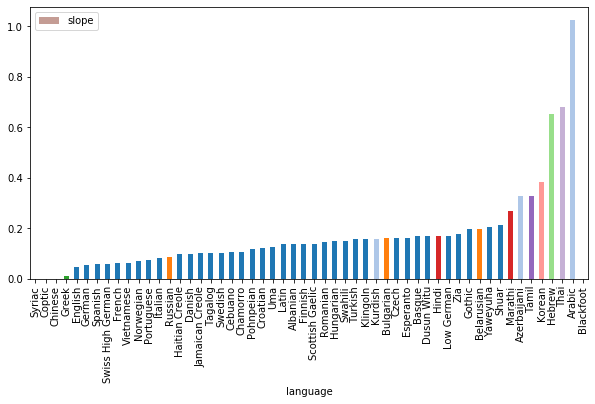

In [120]:
results_regression_language_name_df.plot.bar(y = "slope", figsize= (10,5), color = results_regression_language_name_df["main writing system_colors"])

## Unknown Tokens

### Indo-European Languages

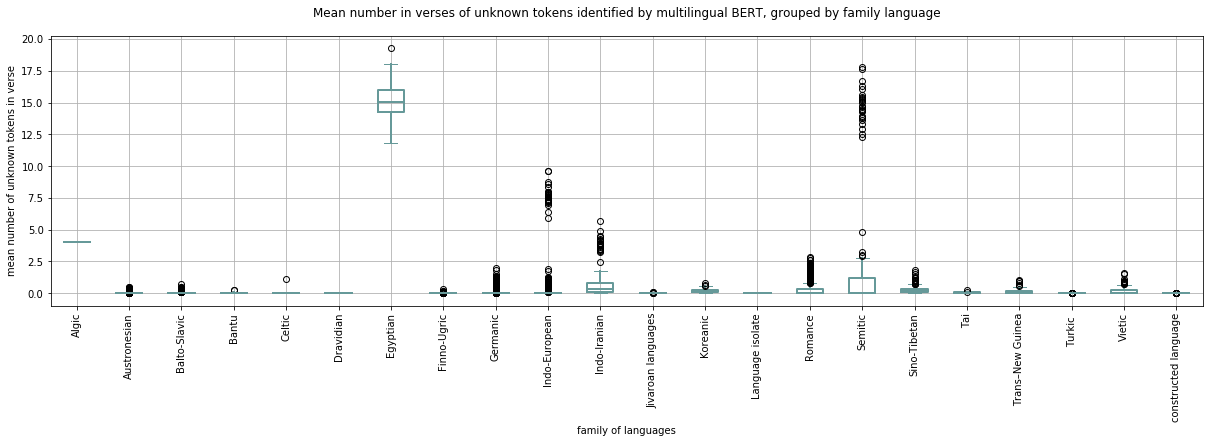

In [121]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "family of languages", rot = 90, xlabel = "family of languages", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by family language", figure_name = "unknown_tokens_languages")

In [122]:
metadata.groupby("family of languages")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

family of languages
Language isolate         0.000000
Dravidian                0.000000
constructed language     0.000636
Turkic                   0.000706
Finno-Ugric              0.010357
Jivaroan languages       0.012769
Austronesian             0.027564
Balto-Slavic             0.040474
Bantu                    0.043971
Tai                      0.046730
Germanic                 0.059237
Trans–New Guinea         0.161269
Celtic                   0.181030
Vietic                   0.196425
Koreanic                 0.236849
Sino-Tibetan             0.275564
Romance                  0.290781
Indo-European            0.378315
Indo-Iranian             0.956997
Semitic                  1.424440
Algic                    4.026585
Egyptian                15.196794
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [123]:
metadata.groupby("is_Romance_or_Germanic?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

is_Romance_or_Germanic?
True     0.163863
False    0.440447
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [124]:
results_romance_germanic_unks_df = functions.test_differences_columns(metadata, "is_Romance_or_Germanic?", "bert_multilingual_cased_count_unks_mean")

In [125]:
results_romance_germanic_unks_df

value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  3.844223e-16   8.180789      0.440447      0.163863   

   median_value_1  median_value_2 significance  
0             0.0             0.0          ***

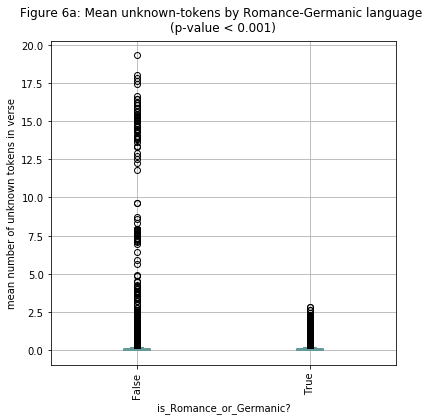

In [126]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "is_Romance_or_Germanic?", rot = 90,
xlabel = "is_Romance_or_Germanic?", ylabel = "mean number of unknown tokens in verse",
title = "Figure 6a: Mean unknown-tokens by Romance-Germanic language \n(p-value < 0.001)",
figsize=(6,6),
figure_name = "figure6a_unknown_tokens_romance_germanic")


### English

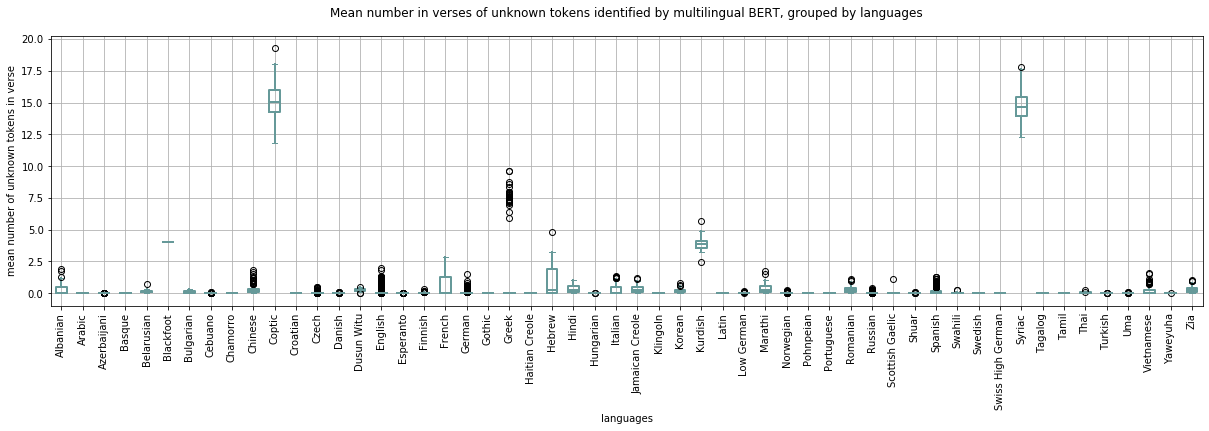

In [127]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "language", rot = 90, xlabel = "languages", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by languages", figure_name = "unknown_tokens_languages")

In [128]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values(ascending=True).head(20)

language
Gothic               0.000000
Tagalog              0.000000
Swiss High German    0.000000
Croatian             0.000000
Tamil                0.000000
Klingoln             0.000000
Chamorro             0.000000
Haitian Creole       0.000000
Swedish              0.000000
Latin                0.000000
Portuguese           0.000000
Basque               0.000000
Arabic               0.000000
Hungarian            0.000038
Yaweyuha             0.000041
Turkish              0.000198
Azerbaijani          0.001207
Esperanto            0.001271
Cebuano              0.003353
Danish               0.011211
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [129]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values(ascending=True).index.tolist().index("English")

31

In [130]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values(ascending=False)

language
Coptic               15.196794
Syriac               14.781034
Blackfoot             4.026585
Kurdish               3.887323
Hebrew                0.757673
French                0.610106
Greek                 0.399758
Marathi               0.381349
Jamaican Creole       0.379659
Hindi                 0.333875
Zia                   0.322497
Romanian              0.312654
Albanian              0.293519
Chinese               0.275564
Dusun Witu            0.243753
Korean                0.236849
Italian               0.236327
Vietnamese            0.196425
Scottish Gaelic       0.181030
Belarusian            0.147802
Spanish               0.132011
Bulgarian             0.099340
English               0.079559
Thai                  0.046730
Swahili               0.043971
German                0.036856
Russian               0.026316
Czech                 0.020900
Finnish               0.020675
Norwegian             0.019751
Pohnpeian             0.018477
Low German            0.016235

In [131]:
results_english_unks_df = functions.test_differences_columns(metadata, "is_English?", "bert_multilingual_cased_count_unks_mean")

In [132]:
results_english_unks_df

value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  1.177773e-49  14.893617        0.2962      0.079559   

   median_value_1  median_value_2 significance  
0             0.0             0.0          ***

In [133]:
metadata.groupby("is_English?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()

is_English?
True     0.079559
False    0.296200
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

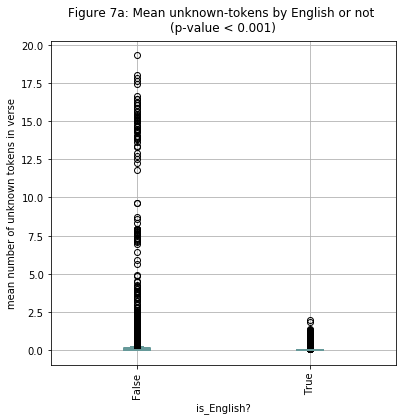

In [134]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "is_English?", rot = 90,
xlabel = "is_English?", ylabel = "mean number of unknown tokens in verse",
title = "Figure 7a: Mean unknown-tokens by English or not \n(p-value < 0.001)",
figsize=(6,6),
figure_name = "figure7a_unknown_tokens_english")


In [135]:
results_languages_unks_df = functions.test_differences_columns(metadata, "language", "bert_multilingual_cased_count_unks_mean")

C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\calvotello\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\calvotello\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [136]:
results_english_unks_fewer_df = results_languages_unks_df.loc[((results_languages_unks_df["value1"] == "English") & (results_languages_unks_df["mean_value_1"] < results_languages_unks_df["mean_value_2"]) )
|
((results_languages_unks_df["value2"] == "English") & (results_languages_unks_df["mean_value_2"] < results_languages_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [137]:
results_english_unks_fewer_df

value1           value2         pvalue  statistic  mean_value_1  \
692     English           French  1.528894e-107 -24.292926      0.079559   
719     English           Syriac   1.203344e-28 -55.973757      0.079559   
489      Coptic          English   2.075968e-27  50.132584     15.196794   
704     English          Kurdish   3.767918e-23 -34.061016      0.079559   
697     English           Hebrew   9.398543e-23 -10.804342      0.079559   
711     English         Romanian   1.293025e-19 -10.568222      0.079559   
446     Chinese          English   6.374755e-15   8.402688      0.275564   
700     English          Italian   9.787210e-15  -8.079278      0.079559   
715     English          Spanish   1.222365e-13  -7.450893      0.079559   
703     English           Korean   1.889345e-11  -7.955380      0.079559   
698     English            Hindi   2.266978e-09  -6.904285      0.079559   
707     English          Marathi   1.108725e-08  -6.525721      0.079559   
14     Albanian          English   2.652276e-08   5.909866      0.293519   
651  Dusun Witu          English   1.666362e-07   6.916186      0.243753   
695     English            Greek   2.645553e-05  -4.239674      0.079559   
216  Belarusian          English   3.463218e-05   4.399239      0.147802   
725     English       Vietnamese   1.122570e-04  -3.977645      0.079559   
701     English  Jamaican Creole   1.710268e-04  -4.377745      0.079559   
727     English              Zia   3.761824e-04  -4.076911      0.079559   
311   Bulgarian          English   5.652504e-02   1.923309      0.099340   
713     English  Scottish Gaelic   5.993877e-01  -0.560355      0.079559   
264   Blackfoot          English            NaN        NaN      4.026585   

     mean_value_2  median_value_1  median_value_2 significance  
692      0.610106        0.000000        0.019872          ***  
719     14.781034        0.000000       14.650000          ***  
489      0.079559       15.050243        0.000000          ***  
704      3.887323        0.000000        3.838604          ***  
697      0.757673        0.000000        0.224490          ***  
711      0.312654        0.000000        0.243848          ***  
446      0.079559        0.157965        0.000000          ***  
700      0.236327        0.000000        0.000000          ***  
715      0.132011        0.000000        0.028709          ***  
703      0.236849        0.000000        0.188931          ***  
698      0.333875        0.000000        0.242241          ***  
707      0.381349        0.000000        0.292154          ***  
14       0.079559        0.000000        0.000000          ***  
651      0.079559        0.235294        0.000000          ***  
695      0.399758        0.000000        0.000000          ***  
216      0.079559        0.117575        0.000000          ***  
725      0.196425        0.000000        0.006201          ***  
701      0.379659        0.000000        0.238636          ***  
727      0.322497        0.000000        0.227848          ***  
311      0.079559        0.086957        0.000000               
713      0.181030        0.000000        0.000000               
264      0.079559        4.026585        0.000000

In [138]:
results_english_unks_fewer_df.shape

(22, 9)

In [139]:
results_english_unks_more_df = results_languages_unks_df.loc[((results_languages_unks_df["value1"] == "English") & (results_languages_unks_df["mean_value_1"] >= results_languages_unks_df["mean_value_2"]) )
|
((results_languages_unks_df["value2"] == "English") & (results_languages_unks_df["mean_value_2"] >= results_languages_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [140]:
results_english_unks_more_df

value1             value2        pvalue  statistic  mean_value_1  \
66        Arabic            English  8.959060e-70 -18.260348      0.000000   
721      English              Tamil  8.959060e-70  18.260348      0.079559   
720      English            Tagalog  8.959060e-70  18.260348      0.079559   
718      English  Swiss High German  8.959060e-70  18.260348      0.079559   
717      English            Swedish  8.959060e-70  18.260348      0.079559   
710      English         Portuguese  8.959060e-70  18.260348      0.079559   
702      English           Klingoln  8.959060e-70  18.260348      0.079559   
696      English     Haitian Creole  8.959060e-70  18.260348      0.079559   
694      English             Gothic  8.959060e-70  18.260348      0.079559   
705      English              Latin  8.959060e-70  18.260348      0.079559   
531     Croatian            English  8.959060e-70 -18.260348      0.000000   
167       Basque            English  8.959060e-70 -18.260348      0.000000   
402     Chamorro            English  8.959060e-70 -18.260348      0.000000   
699      English          Hungarian  1.034492e-69  18.251344      0.079559   
726      English           Yaweyuha  1.055727e-69  18.250002      0.079559   
723      English            Turkish  2.044705e-69  18.207920      0.079559   
690      English          Esperanto  2.948031e-67  17.887557      0.079559   
117  Azerbaijani            English  3.705953e-67 -17.870651      0.001207   
357      Cebuano            English  1.599086e-59 -16.725206      0.003353   
612       Danish            English  1.145609e-44 -14.377617      0.011211   
709      English          Pohnpeian  2.186981e-25  11.612240      0.079559   
708      English          Norwegian  8.089614e-24  10.462496      0.079559   
691      English            Finnish  1.488497e-23  10.376086      0.079559   
572        Czech            English  2.950383e-22  -9.901981      0.020900   
712      English            Russian  2.820687e-20   9.370907      0.079559   
706      English         Low German  1.356793e-18   9.845522      0.079559   
693      English             German  2.734814e-16   8.223204      0.079559   
714      English              Shuar  1.246383e-14   9.676493      0.079559   
724      English                Uma  1.300430e-12   8.948626      0.079559   
722      English               Thai  3.257068e-06   4.802756      0.079559   
716      English            Swahili  1.584133e-02   2.553886      0.079559   

     mean_value_2  median_value_1  median_value_2 significance  
66       0.079559             0.0        0.000000          ***  
721      0.000000             0.0        0.000000          ***  
720      0.000000             0.0        0.000000          ***  
718      0.000000             0.0        0.000000          ***  
717      0.000000             0.0        0.000000          ***  
710      0.000000             0.0        0.000000          ***  
702      0.000000             0.0        0.000000          ***  
696      0.000000             0.0        0.000000          ***  
694      0.000000             0.0        0.000000          ***  
705      0.000000             0.0        0.000000          ***  
531      0.079559             0.0        0.000000          ***  
167      0.079559             0.0        0.000000          ***  
402      0.079559             0.0        0.000000          ***  
699      0.000038             0.0        0.000000          ***  
726      0.000041             0.0        0.000000          ***  
723      0.000198             0.0        0.000000          ***  
690      0.001271             0.0        0.000000          ***  
117      0.079559             0.0        0.000000          ***  
357      0.079559             0.0        0.000000          ***  
612      0.079559             0.0        0.000000          ***  
709      0.018477             0.0        0.017555          ***  
708      0.019751             0.0        0.000000          ***  
691      0.020675 

In [141]:
results_english_unks_more_df.shape

(31, 9)

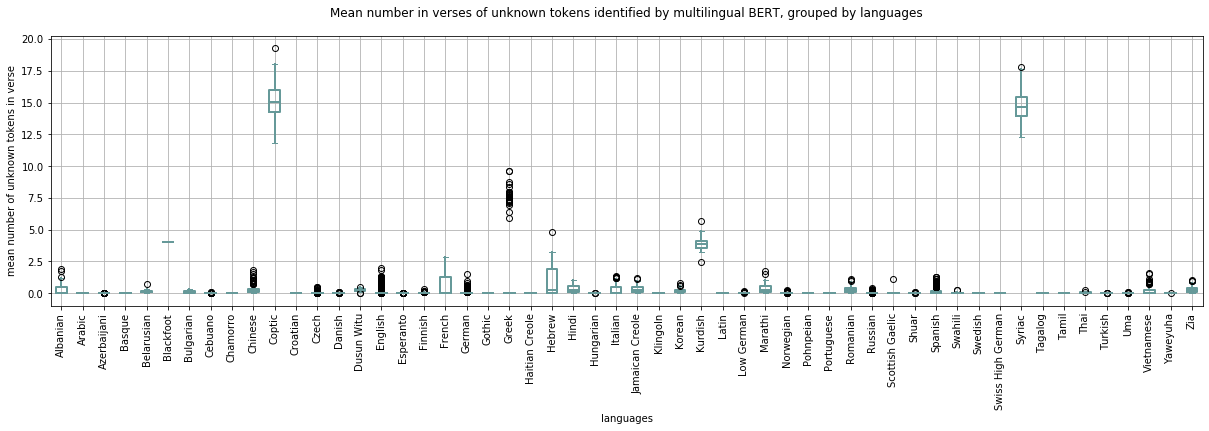

In [142]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "language", rot = 90, xlabel = "languages",
ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified by multilingual BERT, grouped by languages", figure_name = "unknown_tokens_languages")

### Writing System

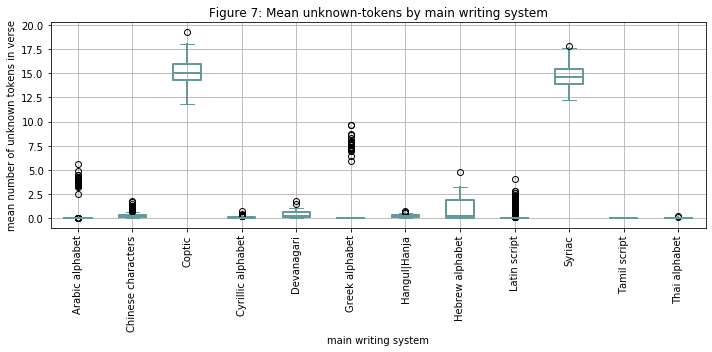

In [17]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "main writing system",
rot = 90, xlabel = "main writing system", ylabel = "mean number of unknown tokens in verse",
title = "Figure 7: Mean unknown-tokens by main writing system",
figure_name = "figure7_unknown_tokens__alphabet",
figsize=(10,5))

In [144]:
results_writing_unks_df = functions.test_differences_columns(metadata, "main writing system", "bert_multilingual_cased_count_unks_mean")

In [145]:
results_writing_unks_df

value1              value2         pvalue  statistic  \
0   Arabic alphabet  Chinese characters   3.033878e-02   2.177809   
1   Arabic alphabet              Coptic   6.526360e-30 -46.982338   
2   Arabic alphabet   Cyrillic alphabet   3.251552e-06   4.774550   
3   Arabic alphabet          Devanagari   2.206197e-01   1.227704   
4   Arabic alphabet      Greek alphabet   5.450411e-01   0.605578   
..              ...                 ...            ...        ...   
61     Latin script        Tamil script  8.565068e-300  38.424236   
62     Latin script       Thai alphabet   4.899533e-33  15.469632   
63           Syriac        Tamil script   1.072360e-28  56.284413   
64           Syriac       Thai alphabet   1.123515e-28  56.095191   
65     Tamil script       Thai alphabet   8.330651e-13  -8.871876   

    mean_value_1  mean_value_2  median_value_1  median_value_2 significance  
0       0.468917      0.275564            0.00        0.157965            *  
1       0.468917     15.196794            0.00       15.050243          ***  
2       0.468917      0.058864            0.00        0.000000          ***  
3       0.468917      0.357612            0.00        0.260870               
4       0.468917      0.399758            0.00        0.000000               
..           ...           ...             ...             ...          ...  
61      0.147571      0.000000            0.00        0.000000          ***  
62      0.147571      0.046730            0.00        0.043187          ***  
63     14.781034      0.000000           14.65        0.000000          ***  
64     14.781034      0.046730           14.65        0.043187          ***  
65      0.000000      0.046730            0.00        0.043187          ***  

[66 rows x 9 columns]

In [146]:
positive_results_writing_unks_df = results_writing_unks_df.loc[((results_writing_unks_df["value1"] == "Latin script") & (results_writing_unks_df["mean_value_1"] < results_writing_unks_df["mean_value_2"]) )
|
((results_writing_unks_df["value2"] == "Latin script") & (results_writing_unks_df["mean_value_2"] < results_writing_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [147]:
positive_results_writing_unks_df

value1        value2        pvalue  statistic  mean_value_1  \
60        Latin script        Syriac  1.363560e-28 -55.716523      0.147571   
26              Coptic  Latin script  2.340425e-27  49.908203     15.196794   
56     Hebrew alphabet  Latin script  2.748689e-19   9.725949      0.757673   
41          Devanagari  Latin script  6.595821e-11   7.093271      0.357612   
17  Chinese characters  Latin script  1.060954e-07   5.508527      0.275564   
52        Hangul|Hanja  Latin script  2.268309e-05   4.540156      0.236849   
7      Arabic alphabet  Latin script  2.314822e-04   3.742648      0.468917   
47      Greek alphabet  Latin script  8.962501e-04   3.340393      0.399758   

    mean_value_2  median_value_1  median_value_2 significance  
60     14.781034        0.000000           14.65          ***  
26      0.147571       15.050243            0.00          ***  
56      0.147571        0.224490            0.00          ***  
41      0.147571        0.260870            0.00          ***  
17      0.147571        0.157965            0.00          ***  
52      0.147571        0.188931            0.00          ***  
7       0.147571        0.000000            0.00          ***  
47      0.147571        0.000000            0.00          ***

In [148]:
negative_results_writing_unks_df = results_writing_unks_df.loc[((results_writing_unks_df["value1"] == "Latin script") & (results_writing_unks_df["mean_value_1"] >= results_writing_unks_df["mean_value_2"]) )
|
((results_writing_unks_df["value2"] == "Latin script") & (results_writing_unks_df["mean_value_2"] >= results_writing_unks_df["mean_value_1"]) )
].sort_values(by="pvalue")

In [149]:
negative_results_writing_unks_df

value1         value2         pvalue  statistic  mean_value_1  \
61       Latin script   Tamil script  8.565068e-300  38.424236      0.147571   
34  Cyrillic alphabet   Latin script   2.307935e-49 -15.359944      0.058864   
62       Latin script  Thai alphabet   4.899533e-33  15.469632      0.147571   

    mean_value_2  median_value_1  median_value_2 significance  
61      0.000000             0.0        0.000000          ***  
34      0.147571             0.0        0.000000          ***  
62      0.046730             0.0        0.043187          ***

In [150]:
results_writing_wo_germanic_romance_unknown_df = functions.test_differences_columns(metadata.loc[(~metadata["family of languages"].isin(["Germanic","Romance"]) ) ], "main writing system", "bert_multilingual_cased_count_unks_mean")



In [151]:
results_writing_wo_germanic_romance_unknown_df

value1              value2        pvalue  statistic  \
0   Arabic alphabet  Chinese characters  3.033878e-02   2.177809   
1   Arabic alphabet              Coptic  6.526360e-30 -46.982338   
2   Arabic alphabet   Cyrillic alphabet  3.251552e-06   4.774550   
3   Arabic alphabet          Devanagari  2.206197e-01   1.227704   
4   Arabic alphabet      Greek alphabet  5.450411e-01   0.605578   
..              ...                 ...           ...        ...   
61     Latin script        Tamil script  2.860009e-28  11.254038   
62     Latin script       Thai alphabet  2.566711e-02   2.242801   
63           Syriac        Tamil script  1.072360e-28  56.284413   
64           Syriac       Thai alphabet  1.123515e-28  56.095191   
65     Tamil script       Thai alphabet  8.330651e-13  -8.871876   

    mean_value_1  mean_value_2  median_value_1  median_value_2 significance  
0       0.468917      0.275564            0.00        0.157965            *  
1       0.468917     15.196794            0.00       15.050243          ***  
2       0.468917      0.058864            0.00        0.000000          ***  
3       0.468917      0.357612            0.00        0.260870               
4       0.468917      0.399758            0.00        0.000000               
..           ...           ...             ...             ...          ...  
61      0.064134      0.000000            0.00        0.000000          ***  
62      0.064134      0.046730            0.00        0.043187            *  
63     14.781034      0.000000           14.65        0.000000          ***  
64     14.781034      0.046730           14.65        0.043187          ***  
65      0.000000      0.046730            0.00        0.043187          ***  

[66 rows x 9 columns]

In [152]:
results_writing_wo_germanic_romance_unknown_df.loc[((results_writing_wo_germanic_romance_unknown_df["value1"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_1"] < results_writing_wo_germanic_romance_unknown_df["mean_value_2"]) )
|
((results_writing_wo_germanic_romance_unknown_df["value2"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_2"] < results_writing_wo_germanic_romance_unknown_df["mean_value_1"]) )
].sort_values(by="pvalue")

value1        value2        pvalue  statistic  mean_value_1  \
60        Latin script        Syriac  1.151412e-28 -56.027009      0.064134   
26              Coptic  Latin script  1.997825e-27  50.180016     15.196794   
56     Hebrew alphabet  Latin script  1.591198e-23  11.031241      0.757673   
41          Devanagari  Latin script  1.204865e-17   9.812317      0.357612   
17  Chinese characters  Latin script  1.408415e-16   8.953650      0.275564   
52        Hangul|Hanja  Latin script  7.580188e-13   8.588613      0.236849   
7      Arabic alphabet  Latin script  4.359029e-06   4.708762      0.468917   
47      Greek alphabet  Latin script  1.103014e-05   4.438674      0.399758   

    mean_value_2  median_value_1  median_value_2 significance  
60     14.781034        0.000000           14.65          ***  
26      0.064134       15.050243            0.00          ***  
56      0.064134        0.224490            0.00          ***  
41      0.064134        0.260870            0.00          ***  
17      0.064134        0.157965            0.00          ***  
52      0.064134        0.188931            0.00          ***  
7       0.064134        0.000000            0.00          ***  
47      0.064134        0.000000            0.00          ***

In [153]:
results_writing_wo_germanic_romance_unknown_df.loc[((results_writing_wo_germanic_romance_unknown_df["value1"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_1"] >= results_writing_wo_germanic_romance_unknown_df["mean_value_2"]) )
|
((results_writing_wo_germanic_romance_unknown_df["value2"] == "Latin script") & (results_writing_wo_germanic_romance_unknown_df["mean_value_2"] >= results_writing_wo_germanic_romance_unknown_df["mean_value_1"]) )
].sort_values(by="pvalue")

value1         value2        pvalue  statistic  mean_value_1  \
61       Latin script   Tamil script  2.860009e-28  11.254038      0.064134   
62       Latin script  Thai alphabet  2.566711e-02   2.242801      0.064134   
34  Cyrillic alphabet   Latin script  4.609909e-01  -0.737376      0.058864   

    mean_value_2  median_value_1  median_value_2 significance  
61      0.000000             0.0        0.000000          ***  
62      0.046730             0.0        0.043187            *  
34      0.064134             0.0        0.000000

In [154]:
metadata.columns.tolist()

['index',
 'path',
 'language_code',
 'title',
 'year',
 'number_verses_translation',
 'number_chapters_translation',
 'number_books_translation',
 'source',
 'file_name_translation',
 'book',
 'book_file_name',
 'text_first_verse',
 'id_first_verse',
 'text_count_tokens_mean',
 'text_count_tokens_median',
 'text_count_tokens_std',
 'characters_count_mean',
 'characters_count_median',
 'characters_count_std',
 'bert_cased_count_tokens_mean',
 'bert_cased_count_tokens_median',
 'bert_cased_count_tokens_std',
 'bert_cased_count_parts_tokens_mean',
 'bert_cased_count_parts_tokens_median',
 'bert_cased_count_parts_tokens_std',
 'bert_cased_count_unks_mean',
 'bert_cased_count_unks_median',
 'bert_cased_count_unks_std',
 'bert_multilingual_cased_count_tokens_mean',
 'bert_multilingual_cased_count_tokens_median',
 'bert_multilingual_cased_count_tokens_std',
 'bert_multilingual_cased_count_parts_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_median',
 'bert_multilingual_cased_coun

In [155]:
functions.test_differences_columns(metadata, "in_Latin_script?", "bert_multilingual_cased_count_unks_mean")


value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  9.935301e-23   9.929561      0.718264      0.147571   

   median_value_1  median_value_2 significance  
0             0.0             0.0          ***

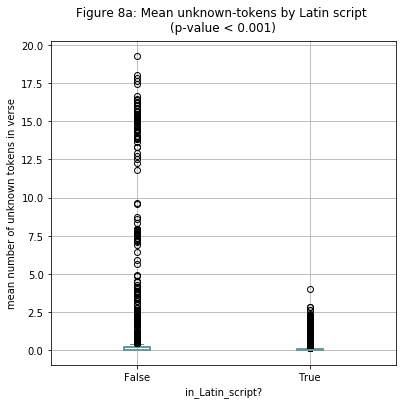

In [191]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "in_Latin_script?", 
xlabel = "in_Latin_script?", ylabel = "mean number of unknown tokens in verse",
title = "Figure 8a: Mean unknown-tokens by Latin script \n(p-value < 0.001)",
figsize=(6,6),
figure_name = "figure8a_unknown_tokens_latin")


### Part of Training Material in BERT

In [157]:
metadata.columns.tolist()[-20:]

['main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'in_Latin_script?',
 'bert_multilingual_cased_count_parts_tokens_median/characters_count_median',
 'bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median',
 'codebook',
 'title_English',
 'genre',
 'genre-multilabel',
 'wikid',
 'division',
 'original_language',
 'translation_period',
 'characters_count_mean/text_count_tokens_mean',
 'main writing system_colors']

In [158]:
results_training_bert_unks_df = functions.test_differences_columns(metadata, "used_in_ml_bert?", "bert_multilingual_cased_count_unks_mean")
results_training_bert_unks_df

value1  value2        pvalue  statistic  mean_value_1  mean_value_2  \
0   False    True  2.249791e-15   8.183735      1.868013      0.175037   

   median_value_1  median_value_2 significance  
0             0.0             0.0          ***

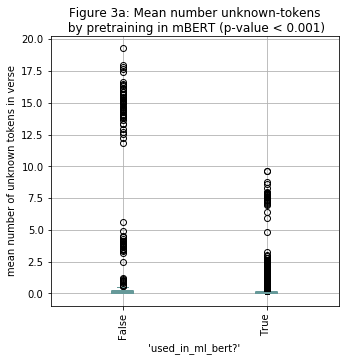

In [159]:
functions.plot_boxplots_by(metadata, "bert_multilingual_cased_count_unks_mean", "used_in_ml_bert?", rot = 90,
xlabel = "'used_in_ml_bert?'", ylabel = "mean number of unknown tokens in verse",
title = "Figure 3a: Mean number unknown-tokens\n by pretraining in mBERT (p-value < 0.001)",
figure_name = "figure3a_unknown_tokens_bert", figsize = (5,5))


In [160]:
metadata.groupby("used_in_ml_bert?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()


used_in_ml_bert?
True     0.175037
False    1.868013
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [161]:
metadata.groupby("used_in_ml_bert?")["bert_multilingual_cased_count_unks_mean"].mean().sort_values()


used_in_ml_bert?
True     0.175037
False    1.868013
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

### Correlation with Wikipedia's size

In [162]:
metadata.columns.tolist()[-20:]

['main writing system',
 'q-values',
 'Continent',
 'used_in_ml_bert?',
 'wikipedia_nr_articles_2021',
 'is_English?',
 'is_Romance_or_Germanic?',
 'in_Latin_script?',
 'bert_multilingual_cased_count_parts_tokens_median/characters_count_median',
 'bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median',
 'codebook',
 'title_English',
 'genre',
 'genre-multilabel',
 'wikid',
 'division',
 'original_language',
 'translation_period',
 'characters_count_mean/text_count_tokens_mean',
 'main writing system_colors']

In [163]:
languages_mean_df.head()

language         macro family of languages main writing system  \
0     Albanian  Albanian-Slavic-Romance-Germanic        Latin script   
2       Arabic                           Semitic     Arabic alphabet   
4  Azerbaijani                           Turkic      Arabic alphabet   
5   Belarusian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
6    Bulgarian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   

        index        year  number_verses_translation  \
0  119.500000    0.000000               31102.000000   
2   85.083969    0.000000               31101.496183   
4  162.000000    0.000000               31102.000000   
5  235.000000    0.000000               31169.000000   
6  147.806452  555.677419               24381.774194   

   number_chapters_translation  number_books_translation  \
0                  1189.000000                 66.000000   
2                  1189.000000                 66.000000   
4                  1189.000000                 66.000000   
5                  1190.000000                 66.000000   
6                   919.290323                 54.677419   

   text_count_tokens_mean  text_count_tokens_median  ...  \
0               28.675941                 27.553030  ...   
2               16.457412                 15.812977  ...   
4               18.533909                 17.810606  ...   
5               23.020679                 22.121212  ...   
6               24.135792                 23.268817  ...   

   bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean  \
0                                           1.678507                  
2                                           4.326791                  
4                                           3.192559                  
5                                           2.009111                  
6                                           1.717894                  

   bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean  \
0                                           0.664223                        
2                                           3.283510                        
4                                           2.057189                        
5                                           1.023780                        
6                                           0.719718                        

   bert_multilingual_cased_count_unks_mean/text_count_tokens_mean  \
0                                           0.009851                
2                                           0.000000                
4                                           0.000061                
5                                           0.006454                
6                                           0.004006                

   used_in_ml_bert?  wikipedia_nr_articles_2021  is_English?  \
0              True                     84162.0        False   
2              True                   1140422.0        False   
4              True                    179494.0        False   
5              True                    209937.0        False   
6              True                    275867.0        False   

   is_Romance_or_Germanic?  in_Latin_script?  \
0                    False              True   
2                    False             False   
4                    False             False   
5                    False             False   
6                    False             False   

   bert_multilingual_cased_count_parts_tokens_median/characters_count_median  \
0                                           0.144235                           
2                                           0.437399                           
4                                           0.326724                           
5                                           0.212890                           
6                                           0.152732                           

   bert_multilingual_cased_count_parts_tokens_median/t

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


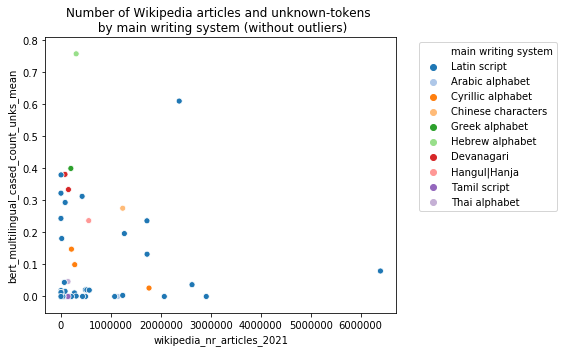

In [164]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (8,5), 
        column_color = "main writing system", title = "Number of Wikipedia articles and unknown-tokens \n by main writing system (without outliers)", outdir = "./../visualizations/", figure_name = "wikipedia_unknown_main_writing")

In [165]:
r, p = stats.pearsonr(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2]["bert_multilingual_cased_count_unks_mean"], languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2]["wikipedia_nr_articles_2021"])
print(r, p)

0.00960433568575679 0.9472212415014569


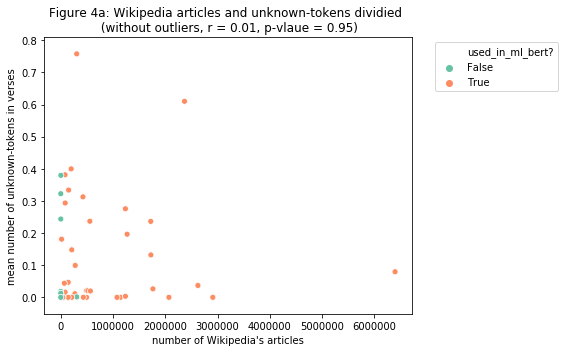

In [166]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (8,5),  xlabel = "number of Wikipedia's articles", ylabel = "mean number of unknown-tokens in verses",
        column_color = "used_in_ml_bert?", title = "Figure 4a: Wikipedia articles and unknown-tokens dividied \n (without outliers, r = 0.01, p-vlaue = 0.95)", palette = "Set2",
        outdir = "./../visualizations/", figure_name = "figure4a_wikipedia_unknown_bert")

In [167]:
r, p = stats.pearsonr(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["bert_multilingual_cased_count_parts_tokens_median"], languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) & ( languages_mean_df["used_in_ml_bert?"] == 1 )]["wikipedia_nr_articles_2021"])
print(r, p)


-0.3825328395393265 0.01777558967956601


In [168]:
languages_mean_df.loc[languages_mean_df["used_in_ml_bert?"] == False][["language","bert_multilingual_cased_count_unks_mean"]].sort_values(by="bert_multilingual_cased_count_unks_mean")

language  bert_multilingual_cased_count_unks_mean
89     Haitian Creole                                 0.000000
152          Klingoln                                 0.000000
2337           Gothic                                 0.000000
2713         Chamorro                                 0.000000
6062         Yaweyuha                                 0.000041
49          Esperanto                                 0.001271
6057              Uma                                 0.012669
6028            Shuar                                 0.012769
2822        Pohnpeian                                 0.018477
6060       Dusun Witu                                 0.243753
6063              Zia                                 0.322497
6004  Jamaican Creole                                 0.379659
5876          Kurdish                                 3.887323
5867        Blackfoot                                 4.026585
6052           Syriac                                14.781034
5877           Coptic                                15.196794

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


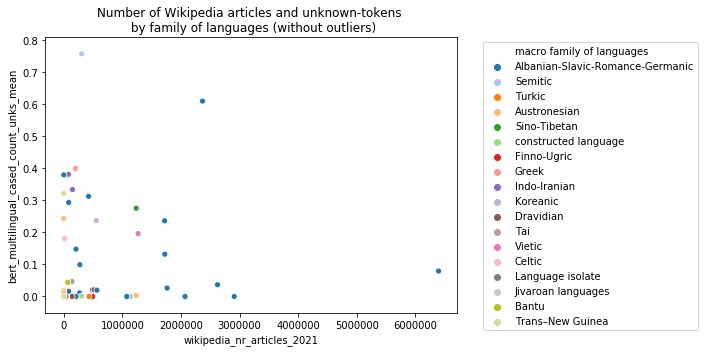

In [169]:
functions.plot_scatter_w_colors(languages_mean_df.loc[languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (10,5), 
        column_color = "macro family of languages", title = "Number of Wikipedia articles and unknown-tokens \n by family of languages (without outliers)", 
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_family_language")

In [170]:
languages_mean_df.head(5)

language         macro family of languages main writing system  \
0     Albanian  Albanian-Slavic-Romance-Germanic        Latin script   
2       Arabic                           Semitic     Arabic alphabet   
4  Azerbaijani                           Turkic      Arabic alphabet   
5   Belarusian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
6    Bulgarian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   

        index        year  number_verses_translation  \
0  119.500000    0.000000               31102.000000   
2   85.083969    0.000000               31101.496183   
4  162.000000    0.000000               31102.000000   
5  235.000000    0.000000               31169.000000   
6  147.806452  555.677419               24381.774194   

   number_chapters_translation  number_books_translation  \
0                  1189.000000                 66.000000   
2                  1189.000000                 66.000000   
4                  1189.000000                 66.000000   
5                  1190.000000                 66.000000   
6                   919.290323                 54.677419   

   text_count_tokens_mean  text_count_tokens_median  ...  \
0               28.675941                 27.553030  ...   
2               16.457412                 15.812977  ...   
4               18.533909                 17.810606  ...   
5               23.020679                 22.121212  ...   
6               24.135792                 23.268817  ...   

   bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean  \
0                                           1.678507                  
2                                           4.326791                  
4                                           3.192559                  
5                                           2.009111                  
6                                           1.717894                  

   bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean  \
0                                           0.664223                        
2                                           3.283510                        
4                                           2.057189                        
5                                           1.023780                        
6                                           0.719718                        

   bert_multilingual_cased_count_unks_mean/text_count_tokens_mean  \
0                                           0.009851                
2                                           0.000000                
4                                           0.000061                
5                                           0.006454                
6                                           0.004006                

   used_in_ml_bert?  wikipedia_nr_articles_2021  is_English?  \
0              True                     84162.0        False   
2              True                   1140422.0        False   
4              True                    179494.0        False   
5              True                    209937.0        False   
6              True                    275867.0        False   

   is_Romance_or_Germanic?  in_Latin_script?  \
0                    False              True   
2                    False             False   
4                    False             False   
5                    False             False   
6                    False             False   

   bert_multilingual_cased_count_parts_tokens_median/characters_count_median  \
0                                           0.144235                           
2                                           0.437399                           
4                                           0.326724                           
5                                           0.212890                           
6                                           0.152732                           

   bert_multilingual_cased_count_parts_tokens_median/t

c:\Users\calvotello\Dropbox\MTB\Göttingen\research\bert_bible_private\code\functions.py:207: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


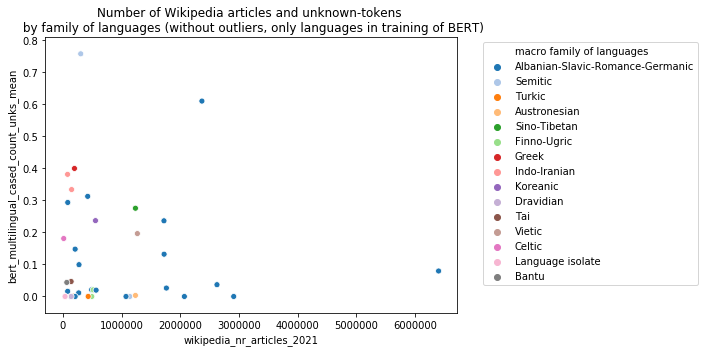

In [171]:
functions.plot_scatter_w_colors(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) & (languages_mean_df["used_in_ml_bert?"] == 1) ],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (10,5), 
        column_color = "macro family of languages", title = "Number of Wikipedia articles and unknown-tokens \n by family of languages (without outliers, only languages in training of BERT)", 
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_family_language_bert")

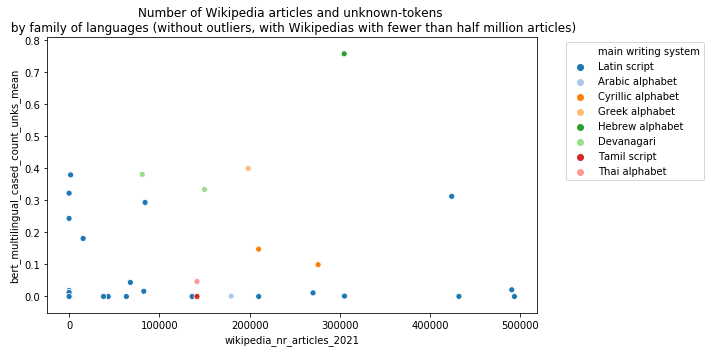

In [172]:
functions.plot_scatter_w_colors(languages_mean_df.loc[(languages_mean_df["bert_multilingual_cased_count_unks_mean"]<2) &  (languages_mean_df["wikipedia_nr_articles_2021"] < 500000)],
        column_x = "wikipedia_nr_articles_2021", column_y = "bert_multilingual_cased_count_unks_mean", figsize= (10,5), 
        column_color = "main writing system", title = "Number of Wikipedia articles and unknown-tokens \n by family of languages (without outliers, with Wikipedias with fewer than half million articles)", 
        outdir = "./../visualizations/", figure_name = "wikipedia_unknown_wirting_system_fewer_half_million_articles")

In [173]:
languages_mean_df

language         macro family of languages main writing system  \
0              Albanian  Albanian-Slavic-Romance-Germanic        Latin script   
2                Arabic                           Semitic     Arabic alphabet   
4           Azerbaijani                           Turkic      Arabic alphabet   
5            Belarusian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
6             Bulgarian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
7               Cebuano                      Austronesian        Latin script   
9               Chinese                      Sino-Tibetan  Chinese characters   
12                Czech  Albanian-Slavic-Romance-Germanic        Latin script   
16               Danish  Albanian-Slavic-Romance-Germanic        Latin script   
18              English  Albanian-Slavic-Romance-Germanic        Latin script   
49            Esperanto              constructed language        Latin script   
50              Finnish                       Finno-Ugric        Latin script   
52               French  Albanian-Slavic-Romance-Germanic        Latin script   
70               German  Albanian-Slavic-Romance-Germanic        Latin script   
86                Greek                             Greek      Greek alphabet   
89       Haitian Creole  Albanian-Slavic-Romance-Germanic        Latin script   
90               Hebrew                           Semitic     Hebrew alphabet   
96                Hindi                      Indo-Iranian          Devanagari   
97            Hungarian                       Finno-Ugric        Latin script   
99              Italian  Albanian-Slavic-Romance-Germanic        Latin script   
104              Korean                          Koreanic        Hangul|Hanja   
105               Latin  Albanian-Slavic-Romance-Germanic        Latin script   
110             Marathi                      Indo-Iranian          Devanagari   
111   Swiss High German  Albanian-Slavic-Romance-Germanic        Latin script   
112           Norwegian  Albanian-Slavic-Romance-Germanic        Latin script   
114          Portuguese  Albanian-Slavic-Romance-Germanic        Latin script   
116            Romanian  Albanian-Slavic-Romance-Germanic        Latin script   
118             Russian  Albanian-Slavic-Romance-Germanic   Cyrillic alphabet   
123            Croatian  Albanian-Slavic-Romance-Germanic        Latin script   
124             Spanish  Albanian-Slavic-Romance-Germanic        Latin script   
144             Swedish  Albanian-Slavic-Romance-Germanic        Latin script   
146               Tamil                         Dravidian        Tamil script   
147             Tagalog                      Austronesian        Latin script   
148                Thai                               Tai       Thai alphabet   
149             Turkish                           Turkic         Latin script   
150          Vietnamese                            Vietic        Latin script   
152            Klingoln              constructed language        Latin script   
2337             Gothic  Albanian-Slavic-Romance-Germanic        Latin script   
2472    Scottish Gaelic                            Celtic        Latin script   
2713           Chamorro                      Austronesian        Latin script   
2818         Low German  Albanian-Slavic-Romance-Germanic        Latin script   
2822          Pohnpeian                      Austronesian        Latin script   
5865             Basque                  Language isolate        Latin script   
5867          Blackfoot                             Algic        Latin script   
5876            Kurdish                      Indo-Iranian     Arabic alphabet   
5877             Coptic                          Egyptian              Coptic   
6004    Jamaican Creole  Albanian-Slavic-Romance-Germanic        Latin script   
6028              Shuar                Jivaroan languages        Latin script   
6049            Swahili                       

# Older things

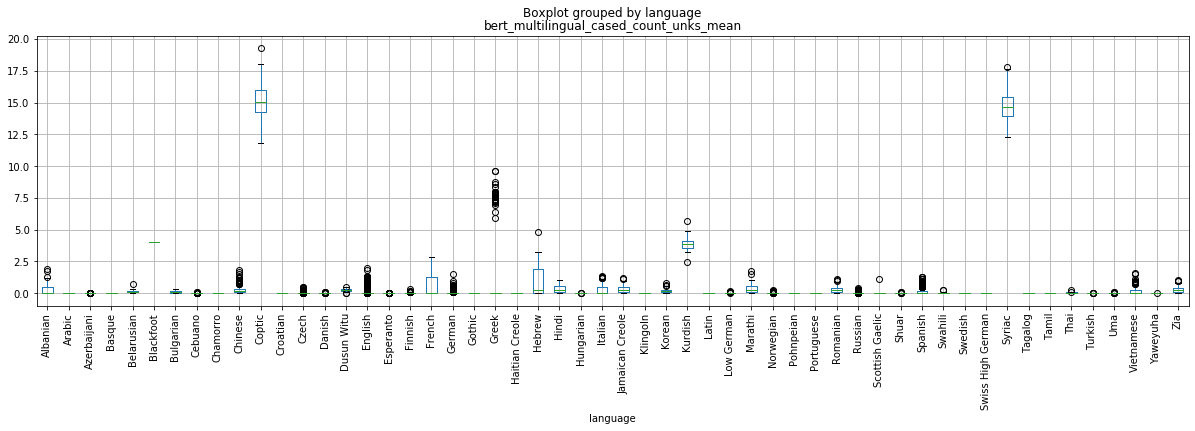

In [174]:
metadata.boxplot("bert_multilingual_cased_count_unks_mean",  by="language", figsize = [20,5], rot=90)
#plt.ylim((0,7))

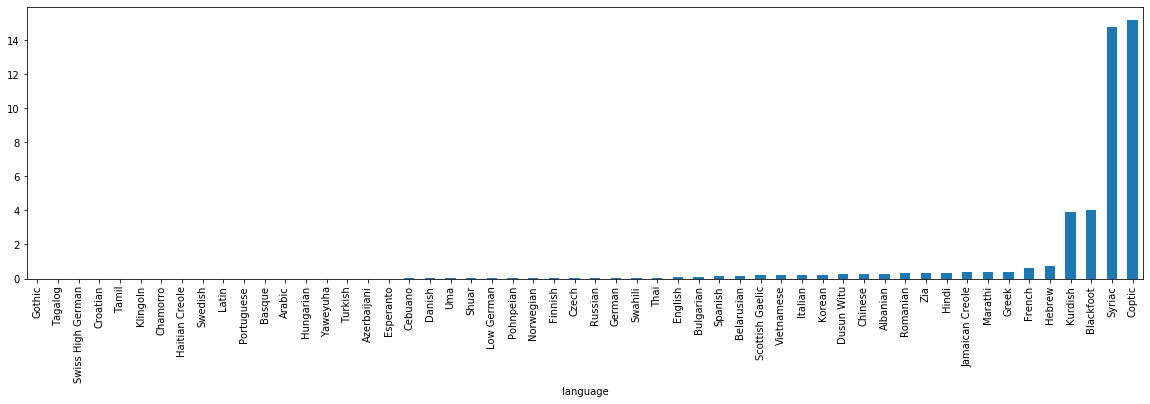

In [175]:
metadata.groupby("language")["bert_multilingual_cased_count_unks_mean"].mean().sort_values().plot.bar(figsize=(20,5))

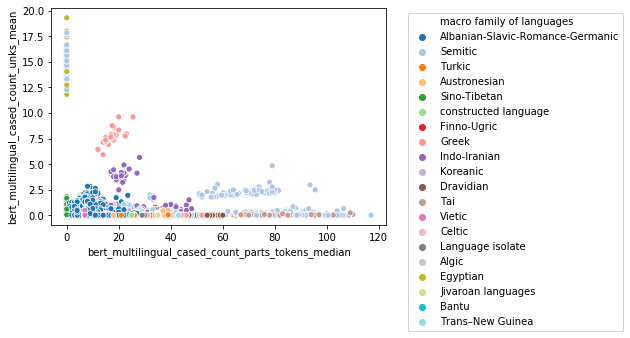

In [176]:
sns.scatterplot(x ="bert_multilingual_cased_count_parts_tokens_median", y = "bert_multilingual_cased_count_unks_mean",
hue = "macro family of languages", data = metadata.loc[(metadata["bert_multilingual_cased_count_tokens_median"] < 140) ],
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1, 
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

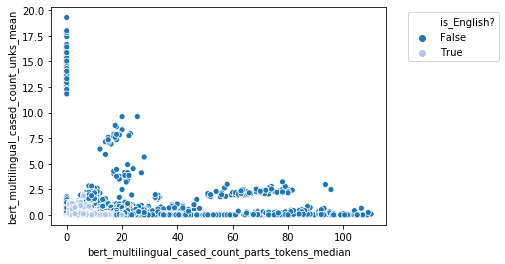

In [177]:
sns.scatterplot(x ="bert_multilingual_cased_count_parts_tokens_median", y = "bert_multilingual_cased_count_unks_mean",
hue = "is_English?", data = metadata.loc[(metadata["bert_multilingual_cased_count_tokens_mean"] < 140) ].sort_values(by="is_English?"),
#& (metadata["macro family of languages"] != "Albanian-Slavic-Romance-Germanic")
palette = "tab20", alpha = 1, 
)


plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

(0, 7)

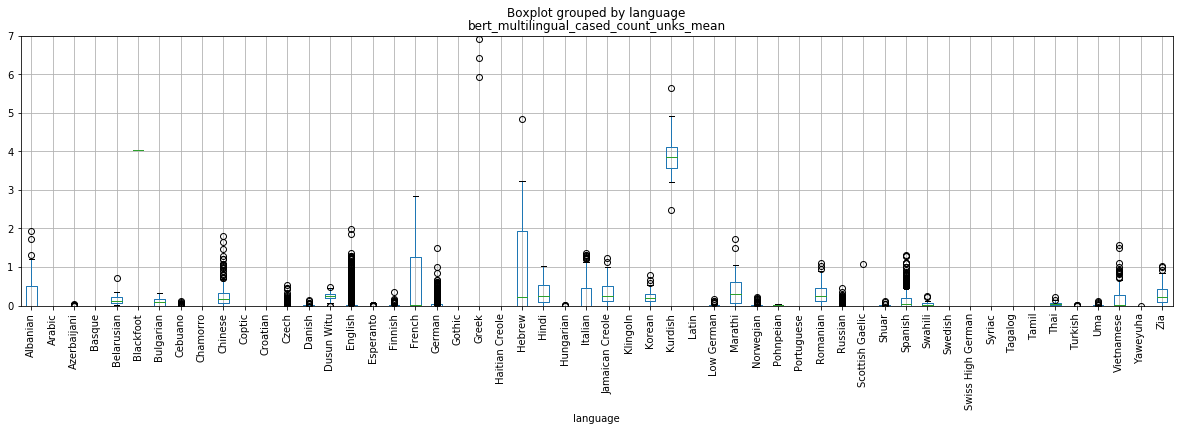

In [178]:
metadata.boxplot("bert_multilingual_cased_count_unks_mean",  by="language", figsize = [20,5], rot=90)
plt.ylim((0,7))

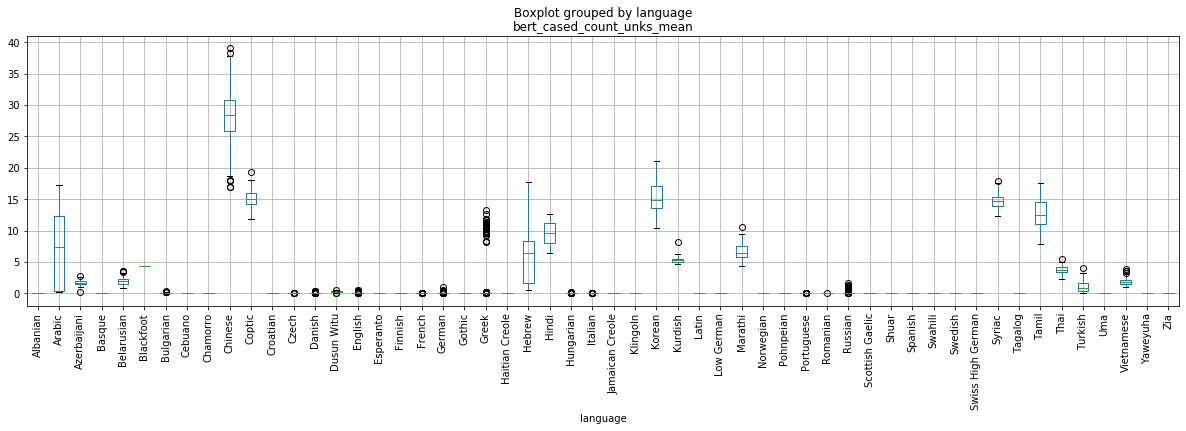

In [179]:
metadata.boxplot("bert_cased_count_unks_mean", by="language", figsize = [20,5], rot=90)
#plt.ylim((0,7))


In [180]:
colors_dc = {"ENG": "blue", "FRE": "red", "LAT": "orange", "SPA": "green", "ITA" : "pink"}

In [181]:
metadata["language_color"] = "gray"

In [182]:
metadata.loc[metadata["language"].isin(["ENG", "FRE", "LAT", "SPA", "ITA"]), "language_color"] = metadata["language"]

In [183]:
metadata["language_color"] = metadata["language_color"].map(colors_dc).fillna("gray")

In [184]:
metadata

index                                               path language_code  \
0        232  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
1          7  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
2        161  ./../data/bibles/transformed_xml_with_year\SF_...           ARA   
3          8  ./../data/bibles/transformed_xml_with_year\SF_...           ARA   
4        162  ./../data/bibles/transformed_xml_with_year\SF_...           AZB   
...      ...                                                ...           ...   
11276    113  ./../data/bibles/transformed_xml_with_year\SF_...           VIE   
11277    199  ./../data/bibles/transformed_xml_with_year\SF_...           WIU   
11278    123  ./../data/bibles/transformed_xml_with_year\SF_...           XKL   
11279    200  ./../data/bibles/transformed_xml_with_year\SF_...           YBY   
11280    196  ./../data/bibles/transformed_xml_with_year\SF_...           ZIA   

                                           title  year  \
0                            Albanian Bible Tosk     0   
1                               Albanian Version     0   
2            New Arabic Version (Ketab El Hayat)     0   
3                    Smith Van Dyke Arabic Bible     0   
4      Description_en=Southern Azeri Translation     0   
...                                          ...   ...   
11276                         Vietnamese Version     0   
11277                          The New Testament     0   
11278                            Klingon Version     0   
11279                          The New Testament     0   
11280                                     Zia NT     0   

       number_verses_translation  number_chapters_translation  \
0                          31102                         1189   
1                          31102                         1189   
2                          31101                         1189   
3                          31102                         1189   
4                          31102                         1189   
...                          ...                          ...   
11276                      31102                         1189   
11277                       7817                          260   
11278                      31083                         1189   
11279                       7482                          241   
11280                       7844                          260   

       number_books_translation   source  \
0                            66  zefania   
1                            66  zefania   
2                            66  zefania   
3                            66  zefania   
4                            66  zefania   
...                         ...      ...   
11276                        66  zefania   
11277                        27  zefania   
11278                        66  zefania   
11279                        27  zefania   
11280                        27  zefania   

                                   file_name_translation  ... title_English  \
0      SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...  ...       Genesis   
1              SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)  ...       Genesis   
2      SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...  ...       Genesis   
3      SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...  ...       Genesis   
4      SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...  ...       Genesis   
...                                                  ...  ...           ...   
11276         SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION)  ...    Revelation   
11277        SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT)  ...    Revelation   
11278        SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION)  ...    Revelation   
11279        SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT)  ...    Revelation   
11280                   SF_2014-04-22_ZIA_ZIANT_(ZIA NT)  ...    Revelation   

             genre        genre-multilabel   wikid    division  \
0       hist

In [185]:
metadata

index                                               path language_code  \
0        232  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
1          7  ./../data/bibles/transformed_xml_with_year\SF_...           ALB   
2        161  ./../data/bibles/transformed_xml_with_year\SF_...           ARA   
3          8  ./../data/bibles/transformed_xml_with_year\SF_...           ARA   
4        162  ./../data/bibles/transformed_xml_with_year\SF_...           AZB   
...      ...                                                ...           ...   
11276    113  ./../data/bibles/transformed_xml_with_year\SF_...           VIE   
11277    199  ./../data/bibles/transformed_xml_with_year\SF_...           WIU   
11278    123  ./../data/bibles/transformed_xml_with_year\SF_...           XKL   
11279    200  ./../data/bibles/transformed_xml_with_year\SF_...           YBY   
11280    196  ./../data/bibles/transformed_xml_with_year\SF_...           ZIA   

                                           title  year  \
0                            Albanian Bible Tosk     0   
1                               Albanian Version     0   
2            New Arabic Version (Ketab El Hayat)     0   
3                    Smith Van Dyke Arabic Bible     0   
4      Description_en=Southern Azeri Translation     0   
...                                          ...   ...   
11276                         Vietnamese Version     0   
11277                          The New Testament     0   
11278                            Klingon Version     0   
11279                          The New Testament     0   
11280                                     Zia NT     0   

       number_verses_translation  number_chapters_translation  \
0                          31102                         1189   
1                          31102                         1189   
2                          31101                         1189   
3                          31102                         1189   
4                          31102                         1189   
...                          ...                          ...   
11276                      31102                         1189   
11277                       7817                          260   
11278                      31083                         1189   
11279                       7482                          241   
11280                       7844                          260   

       number_books_translation   source  \
0                            66  zefania   
1                            66  zefania   
2                            66  zefania   
3                            66  zefania   
4                            66  zefania   
...                         ...      ...   
11276                        66  zefania   
11277                        27  zefania   
11278                        66  zefania   
11279                        27  zefania   
11280                        27  zefania   

                                   file_name_translation  ... title_English  \
0      SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...  ...       Genesis   
1              SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION)  ...       Genesis   
2      SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...  ...       Genesis   
3      SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...  ...       Genesis   
4      SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...  ...       Genesis   
...                                                  ...  ...           ...   
11276         SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION)  ...    Revelation   
11277        SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT)  ...    Revelation   
11278        SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION)  ...    Revelation   
11279        SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT)  ...    Revelation   
11280                   SF_2014-04-22_ZIA_ZIANT_(ZIA NT)  ...    Revelation   

             genre        genre-multilabel   wikid    division  \
0       hist